# **Project Introduction**
## **Raw Data Sources**
- **Issuer level enrollment data from 2014 to 2022**.:https://www.cms.gov/marketplace/resources/data/issuer-level-enrollment-data.
  - Back ground: **The Centers for Medicare &
Medicaid Services(CMS)**  has prepared public data sets to provide the enrollment counts by county for the 33
states that used the HealthCare.gov eligibility and enrollment platform. Those are issuer level enrollment data for the Federally-facilitated Marketplace (FFM). The **Federally Facilitated Marketplace (FFM)** refers to a health insurance exchange established by the United States federal government as part of the implementation of the **Affordable Care Act (ACA)**, also known as **Obamacare**.
  - Data Fields:
    - **Issuer**: an issuer using its unique five-digit Health Insurance Oversight System (HIOS) issuer ID. **In some cases, one parent company has multiple HIOS issuer IDs**. An entity’s **HIOS ID is state-specific**, such
that **a company offering plans through two different state Exchanges appears as two separate issuers**.
    - **County**: The county FIPS Code for the residency address provided by the policy’s subscriber.
    - **State**: The state where the Marketplace plan was purchased.
    - **Average Monthly Enrollment** (for 2021 & 2022 year): The average monthly number of enrollees who had effectuated coverage during the calendar plan year. This metric is calculated by summing the member months of effectuated enrollment and dividing this sum by 12; partial months of coverage are prorated.
    - **Ever Enrolled** (for 2017 to 2020 year): The total number of unique consumers with at least one non-canceled plan selection during
calendar year. Consumers that had multiple enrollments were counted once.
    - **Average Number of Months Enrolled Per Consumer** (for 2021 & 2022 year): The average number of months in which a consumer had effectuated coverage in either the plan or the issuer-county combination.
    - **Household Income as a Percentage of the Federal Poverty Level (FPL)**: A consumer’s annual tax household income measured as a percent of the 2021 FPL for the household size.
    - **Age**: A consumer's age as of January 1 of each calendar year.
    - **Gender**: A consumer’s gender as attested on the Marketplace application.
    - **Tobacco Use**: A consumer’s tobacco use as attested during the Marketplace plan selection process. A consumer
is not counted as a tobacco user if the plan selected did not rate for tobacco use (which implies the actual number is higher)

- **QHP premiums 2024**: https://www.cms.gov/marketplace/resources/data/qualified-health-plan-choice-premiums-healthcaregov-states
  - Back ground: The 2024 data file I downloaded above is from Plan Year 2024 **Qualified Health Plan Choice (QHP)** and Premiums in **HealthCare.gov**. For plan year 2024 (PY24), there are 210 Qualified Health Plan (QHP) issuers in HealthCare.gov Marketplaces. However, to simplify, the 2024 premium I use for this project is only the average county 2024 premiums for specific scenarios - **Average SLCSP QHP premium for a family of four by state and county FIP code**. So, not all 210 QHP issuers are included.
  - Data Fields:
    - **State, County FIPS Code**: similar to issuer level enrollment data
    - **PY24**: calendar year 2024 premiums
    - **PY23-PY24 Change**: premium increase from calendar year 2023 to 2024.
    - **PY20-PY24 5 Year Change**: 5 year premium increase from calendar year 2020 to 2024
    




## **Project Goal**
- EDA:
  - Find trends of important healthcare features over the years. For example: enrollment, premium, premium increase, and etc.
  - Find pattern of important healthcare features across states.
  - Find relationship between important healthcare features.
- Predict 2022 enrollment across states.

# **Content**
- Part 1: Load and combine Data
  - 1.1: Import libraries and load data
  - 1.2: Combine data
- Part 2: EDA and Cleaning for EDA data
  - 2.1: EDA for non-aggregated data
  - 2.2: EDA for aggregated data
- Part 3: Modeling Data - Create Data Frame, EDA, cleaning, and preprocessing for modeling data
  - 3.1: Create modeling data frame
  - 3.2: EDA for modeling data and data preprocessing
- Part 4: Modeling and Evaluations
  - 4.1: Random Forest
  - 4.2: Gradient Boost
  - 4.3: XGBoost
  - 4.4: Feature Importance Analysis


# **Part 1: Load and Combine Data**


## **Part 1.1: Import Libraries and Load Data**




#### **Import Libraries**

In [ ]:
# Import libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import os
import re
import collections
import pandas as pd
import numpy as np
from functools import reduce

from math import sqrt
from scipy import stats
from scipy.stats import norm, skew

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None) # column display option

from sklearn import preprocessing, tree
from sklearn.preprocessing import  OrdinalEncoder, LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, LassoLarsCV, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

import xgboost
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor

#Special display options
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#### **Authentication Google Drive**

In [ ]:
# Authentication Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#### **Load Data Files to Data Frames**

In [ ]:
# Load file from Google Drive
file_id_en22 = '1EKcthe1ZxiF5QIjVHSG7w41AEefWO47-'
file_id_en21 = '1EjEkGp8IHbBG4F0g-Fm2qCxfxrSTcXBL'
file_id_en20 ='1JCQZLjS7TMBD3yMR8dsFpmTMGAl-WpQC'
file_id_en19 ='1XW3Z5X0WEda1hKWW_G6oHAgeT9hhDd12'
file_id_en18 ='12ryHom_pFZmnKUcj22HTaQKO-Lf0VouT'
file_id_en17 ='1inSGC_uHCVDT_mGWrnhyfpv0407DAPvH'
file_id_prems='1HZJdFuqxCxqrkMXpBlIuL1Ht6TbzJIgn'

# Download the files from Google Drive using the file ID
downloaded_en22 = drive.CreateFile({'id': file_id_en22})
downloaded_en22.GetContentFile('2022 Issuer-Level Enrollment PUF.xlsx')
downloaded_en21 = drive.CreateFile({'id': file_id_en21})
downloaded_en21.GetContentFile('2021 Issuer-Level Enrollment PUF (2021 New Data Methodology).xlsx')
downloaded_en20 = drive.CreateFile({'id': file_id_en20})
downloaded_en20.GetContentFile('2020-Enrollment-Disenrollment-PUF.xlsx')
downloaded_en19= drive.CreateFile({'id': file_id_en19})
downloaded_en19.GetContentFile('2019 Issuer-Level Enrollment PUF.xlsx')
downloaded_en18= drive.CreateFile({'id': file_id_en18})
downloaded_en18.GetContentFile('2018 Issuer-Level Enrollment PUF.xlsx')
downloaded_en17= drive.CreateFile({'id': file_id_en17})
downloaded_en17.GetContentFile('2017 Issuer-Level Enrollment PUF.xlsx')
downloaded_prems= drive.CreateFile({'id': file_id_prems})
downloaded_prems.GetContentFile('2024 QHP Premiums Choice Appendix.xlsx')

# read data frame
QHP_2022 = pd.read_excel('2022 Issuer-Level Enrollment PUF.xlsx', sheet_name='QHP Detailed Enrollment')
QHP_2021 = pd.read_excel('2021 Issuer-Level Enrollment PUF (2021 New Data Methodology).xlsx', sheet_name='QHP Detailed Enrollment')
QHP_2020 = pd.read_excel('2020-Enrollment-Disenrollment-PUF.xlsx', sheet_name='QHP Ever Enrolled Details')
QHP_2019 = pd.read_excel('2019 Issuer-Level Enrollment PUF.xlsx', sheet_name='QHP Ever Enrolled Details')
QHP_2018 = pd.read_excel('2018 Issuer-Level Enrollment PUF.xlsx', sheet_name='QHP Ever Enrolled Details')
QHP_2017 = pd.read_excel('2017 Issuer-Level Enrollment PUF.xlsx', sheet_name='QHP Ever Enrolled Details')
QHP_SLCSPFamPrem = pd.read_excel('2024 QHP Premiums Choice Appendix.xlsx', sheet_name='Avg. SLCSP Prem. Family-County')

# check number of rows and cols
print('QHP_2022 rows and columns: ',QHP_2022.shape,'\n' )
print('QHP_2021 rows and columns: ',QHP_2021.shape,'\n' )
print('QHP_2020 rows and columns: ',QHP_2020.shape,'\n' )
print('QHP_2019 rows and columns: ',QHP_2019.shape,'\n' )
print('QHP_2018 rows and columns: ',QHP_2018.shape,'\n' )
print('QHP_2017 rows and columns: ',QHP_2017.shape,'\n' )
print('QHP_AvgSLCSPFamPrem: ',QHP_SLCSPFamPrem.shape,'\n' )

QHP_2022 rows and columns:  (7990, 17) 

QHP_2021 rows and columns:  (6939, 17) 

QHP_2020 rows and columns:  (5969, 16) 

QHP_2019 rows and columns:  (5254, 16) 

QHP_2018 rows and columns:  (4613, 16) 

QHP_2017 rows and columns:  (5698, 16) 

QHP_AvgSLCSPFamPrem:  (63, 7) 



#### **Take a Glance at Individual Loaded Data**

In [ ]:
# Display data frames
QHP_2022.head(2)

,State,Issuer HIOS ID,County FIPS Code,Average Monthly Enrollment,Average Number of Months Enrolled Per Consumer,Female,Male,Ages: 0-17,Ages: 18-34,Ages: 35-54,Ages: 55+,FPL: < 138%,FPL: >= 138% and <= 250%,FPL: > 250% and <= 400%,FPL: > 400%,FPL: Unknown,Smoker
0,AK,38344,02013,17,6.3,*,*,*,*,*,*,*,*,*,*,*,*
1,AK,38344,02016,28,10.2,15,13,*,*,*,*,*,*,*,*,*,*


In [ ]:
QHP_2021.head(2)

,State,Issuer HIOS ID,County FIPS Code,Average Monthly Enrollment,Average Number of Months Enrolled Per Consumer,Female,Male,Ages: 0-17,Ages: 18-34,Ages: 35-54,Ages: 55+,FPL: < 138%,FPL: >= 138% and <= 250%,FPL: > 250% and <= 400%,FPL: > 400%,FPL: Unknown,Smoker
0,AK,38344,2013,14,6.2,*,*,*,*,*,*,*,*,*,*,*,*
1,AK,38344,2016,27,7.8,16,12,*,*,*,*,*,*,*,*,*,*


In [ ]:
QHP_2020.head(2)

,State,Issuer HIOS ID,County FIPS Code,Ever Enrolled,Female,Male,Ages: 0-17,Ages: 18-34,Ages: 35-54,Ages: 55+,FPL: < 138%,FPL: >= 138% and <= 250%,FPL: > 250% and <= 400%,FPL: > 400%,FPL: Unknown,Smoker
0,AK,38344,2013,17,*,*,*,*,*,*,*,*,*,0,*,*
1,AK,38344,2016,40,22,18,*,*,14,*,*,16,16,*,*,*


In [ ]:
QHP_2019.head(2)

,State,Issuer HIOS ID,County FIPS Code,Ever Enrolled,Female,Male,Ages: 0-17,Ages: 18-34,Ages: 35-54,Ages: 55+,FPL: < 138%,FPL: >= 138% and <= 250%,FPL: > 250% and <= 400%,FPL: > 400%,FPL: Unknown,Smoker
0,AK,38344,02013,16,*,*,0,*,*,*,0,*,*,*,*,*
1,AK,38344,02016,37,18,19,*,*,17,*,*,21,*,*,*,*


In [ ]:
QHP_2018.head(2)

,State,Issuer HIOS ID,County FIPS Code,Ever Enrolled,Female,Male,Ages: 0-17,Ages: 18-34,Ages: 35-54,Ages: 55+,FPL: < 138%,FPL: >= 138% and <= 250%,FPL: > 250% and <= 400%,FPL: > 400%,FPL: Unknown,Smoker
0,AK,38344,02013,28,14,14,*,*,*,*,0,11,16,*,*,*
1,AK,38344,02016,32,16,16,*,*,13,*,*,14,*,0,*,*


In [ ]:
QHP_2017.head(2)

,State,Issuer HIOS ID,County FIPS Code,Ever Enrolled,Female,Male,Ages: 0-17,Ages: 18-34,Ages: 35-54,Ages: 55+,FPL: < 138%,FPL: >= 138% and <= 250%,FPL: > 250% and <= 400%,FPL: > 400%,FPL: Unknown,Smoker
0,AK,38344,2013.0,28,12,16,*,*,*,*,0,14,12,*,*,*
1,AK,38344,2016.0,37,15,22,*,*,15,*,0,25,*,*,*,*


In [ ]:
QHP_SLCSPFamPrem.head()

,State,County Name,FIPS Code,City in County,PY24,PY23-PY24 Change,PY20-PY24 5 Year Change
0,AK,Anchorage,2020,Anchorage,2744.21000,0.165680,0.236844
1,AL,Jefferson,1073,Birmingham,1693.42000,0.025296,0.063599
2,AR,Pulaski,5119,Little Rock,1401.84239,0.024396,0.163760
3,AZ,Maricopa,4013,Phoenix,1203.26000,-0.000581,-0.059615
4,AZ,Pima,4019,Tucson,1109.52000,-0.015038,0.054096


✍️**Observations**
- In enrollment datasets, many numerical column has "*". With "*", those columns must be in string type now. We will want to replace those with NA and covert the column types to numerical later.
- For 'County FIP Code', there are different formats across datasets. (EX: 2020 vs. 02020 vs.2020.0). Converting them to numerical data type can fix it. We will combine enrollment data from different years with data field "State","FIPS Code" and "Issuer HIOS ID". So, we will convert "Issuer HIOS ID" to numberical type too to ensure format consistency.
- Enrollment data before 2020 has "Ever Enrolled" field while after 2020 has "Average Monthly Enrollment" field. Those are mentioned on the web.👇

#### **Data Methodology change after 2021**:
There is some new data methodology after 2021. We have 'Ever Enrolled' field before 2021 and 'Average Monthly Enrollment' after 2021.  Details can be found at https://www.cms.gov/marketplace/resources/data/issuer-level-enrollment-data but here I copied the content about it from there. The take aways is they are different and cannot be combined:
- **Ever Enrolled (2017-2020)**: The total number of unique consumers with at least one non-canceled plan selection during
the 2020 calendar year for HealthCare.gov states, including the Federally-facilitated Marketplaces(FFMs),
which included FFMs where states perform plan management functions, and State-based Marketplaces
on the Federal platform. Consumers that had multiple enrollments were counted once. Demographics
were based on the most recent plan selection.

- **Average Monthly Enrollment (2021&2022)**: The average monthly number of enrollees who had effectuated coverage
during the 2021 plan year. This metric is calculated by summing the member months of effectuated
enrollment and dividing this sum by 12; partial months of coverage are prorated.

- **Average Number of Months Enrolled Per Consumer (2021 & 2022)**: This is a new feild in 2021 & 2022. The average number of months in which a consumer had effectuated coverage in either the plan or the issuer-county combination.

## **Part 1.2 Combine Data from Different Sources**

#### **Covert 'County FIPS Code' and 'Issuer HIOS ID' to be numerical type.**
As dicscussed, we will combine enrollment data from different years with data field "State","FIPS Code" and "Issuer HIOS ID". To ensure consistency of county codes and issuer IDs, let's covnert them to numerical type.

In [ ]:
# identify non numerical values in 'County FIPS Code' column
def print_nonnum_indices(df, df_name, col):

    non_convertible_indices = []

    # Iterate over each element in the array
    for i, value in enumerate(df[col]):
        try:
            # Attempt conversion to int
            int_value = int(value)
        except ValueError:
            # If conversion fails, record the index
            non_convertible_indices.append(i)

    # Print the indices of non-convertible elements
    print(f"{df_name} Indices of non-convertible elements:", non_convertible_indices)

print_nonnum_indices(QHP_2022, 'QHP_2022', 'County FIPS Code')
print_nonnum_indices(QHP_2021, 'QHP_2021','County FIPS Code')
print_nonnum_indices(QHP_2020, 'QHP_2020','County FIPS Code')
print_nonnum_indices(QHP_2019, 'QHP_2019','County FIPS Code')
print_nonnum_indices(QHP_2018, 'QHP_2018','County FIPS Code')
print_nonnum_indices(QHP_2017, 'QHP_2017','County FIPS Code')
print_nonnum_indices(QHP_SLCSPFamPrem, 'QHP_SLCSPFamPrem','FIPS Code')

QHP_2022 Indices of non-convertible elements: [6540, 7055]
QHP_2021 Indices of non-convertible elements: []
QHP_2020 Indices of non-convertible elements: []
QHP_2019 Indices of non-convertible elements: [4373]
QHP_2018 Indices of non-convertible elements: [500]
QHP_2017 Indices of non-convertible elements: [351, 663, 4585, 5674]
QHP_SLCSPFamPrem Indices of non-convertible elements: []


Let's take a look what exactly are those values.

In [ ]:
# Take a look at those non-numerical values
print(QHP_2022.loc[[6540,7055],'County FIPS Code'],'\n')
print(QHP_2019.loc[[4373],'County FIPS Code'],'\n')
print(QHP_2018.loc[[500],'County FIPS Code'],'\n')
print(QHP_2017.loc[[351, 663, 4585, 5674],'County FIPS Code'],'\n')

6540    Unknown
7055    Unknown
Name: County FIPS Code, dtype: object 

4373    Unknown
Name: County FIPS Code, dtype: object 

500    Unknown
Name: County FIPS Code, dtype: object 

351    NaN
663    NaN
4585   NaN
5674   NaN
Name: County FIPS Code, dtype: float64 



Gladly, there aren't many of them and there are only two types ('Unknown' or missing values). It's safe to just exclude those rows.

In [ ]:
# Delete rows with non numerical or missing 'County FIPS Code'
def delete_irregular_rows(df, col, irregular):
    '''
    Inplace deletion of irregular rows in data frame. reset index after deletion
    df: data frame to look at
    col: name of the column for irregular content
    irregular: irregular content
    '''
    df = df[df[col] != irregular]
    df.reset_index(drop=True, inplace=True)  # Use drop=True to drop the old index
    return df

# Call the del function for each DataFrame
QHP_2022 = delete_irregular_rows(QHP_2022, 'County FIPS Code', 'Unknown')
QHP_2019 = delete_irregular_rows(QHP_2019, 'County FIPS Code', 'Unknown')
QHP_2018 = delete_irregular_rows(QHP_2018, 'County FIPS Code', 'Unknown')

# Drop missing values in 'County FIPS Code' for 2017 QHP
QHP_2017.dropna(subset=['County FIPS Code'], inplace=True)
QHP_2017.reset_index(drop=True, inplace=True)


In [ ]:
# convert 'Issuer HIOS ID','County FIPS Code' to numberical type
obj_cols=['Issuer HIOS ID','County FIPS Code']
QHP_2022.loc[:,obj_cols] = QHP_2022.loc[:,obj_cols].astype(int)
QHP_2021.loc[:,obj_cols] = QHP_2021.loc[:,obj_cols].astype(int)
QHP_2020.loc[:,obj_cols] = QHP_2020.loc[:,obj_cols].astype(int)
QHP_2019.loc[:,obj_cols] = QHP_2019.loc[:,obj_cols].astype(int)
QHP_2018.loc[:,obj_cols] = QHP_2018.loc[:,obj_cols].astype(int)
QHP_2017.loc[:,obj_cols] = QHP_2017.loc[:,obj_cols].astype(int)

In [ ]:
# convert 'Issuer HIOS ID','County FIPS Code' to numberical type
# obj_cols=['Issuer HIOS ID','County FIPS Code']
# QHP_2022[obj_cols] = QHP_2022[obj_cols].astype(int)
# QHP_2021[obj_cols] = QHP_2021[obj_cols].astype(int)
# QHP_2020[obj_cols] = QHP_2020[obj_cols].astype(int)
# QHP_2019[obj_cols] = QHP_2019[obj_cols].astype(int)
# QHP_2018[obj_cols] = QHP_2018[obj_cols].astype(int)
# QHP_2017[obj_cols] = QHP_2017[obj_cols].astype(int)


#### **Create ratios columns**:
County's are all from different sizes. For EDA, I think it doesn't make sense to compare for example female and male counts. Instead, things like ratio of female vs. males are more intuitively valuable. For prediction, adding those counts will get total enrollment, so it doens't make sense too to use them for prediction too. Thus, We'll create some ratio columns and delete the non-ratio ones.


In [ ]:
#  Calculate ratios
def cal_ratio(df):

    # replace "*" with NaN in the copied DataFrame
    df.replace("*", np.nan, inplace=True)

    # Specify columns used in calculation for different years
    # Recall "Ever Enrolled" for 2017 to 2020, "Average Monthly Enrollment" for 2021 & 2022
    if df.equals(QHP_2022) or df.equals(QHP_2021):
            ori_num_cols=['Female','Male', 'Smoker', 'Average Monthly Enrollment',  'Ages: 0-17', 'Ages: 18-34', 'Ages: 35-54', 'Ages: 55+', 'FPL: < 138%',
            'FPL: >= 138% and <= 250%', 'FPL: > 250% and <= 400%', 'FPL: > 400% ',
            'FPL: Unknown']
            cols_to_drop=['Female','Male', 'Smoker',   'Ages: 0-17', 'Ages: 18-34', 'Ages: 35-54', 'Ages: 55+', 'FPL: < 138%',
            'FPL: >= 138% and <= 250%', 'FPL: > 250% and <= 400%', 'FPL: > 400% ',
            'FPL: Unknown']
    else:
            ori_num_cols=['Female','Male', 'Smoker', 'Ever Enrolled', 'Ages: 0-17', 'Ages: 18-34', 'Ages: 35-54', 'Ages: 55+', 'FPL: < 138%',
            'FPL: >= 138% and <= 250%', 'FPL: > 250% and <= 400%', 'FPL: > 400% ',
            'FPL: Unknown']

    #convert object to int. Many of those columns are in string type. covert them to numberical.
    df[ori_num_cols]=df[ori_num_cols].fillna(0).astype(int)

    # ratio calculation
    df['Male_Female_Ratio'] =df['Male'] / df['Female']
    df['all ages'] = df['Ages: 0-17'] +df['Ages: 18-34']+df['Ages: 35-54']+df['Ages: 55+']
    df['ages: 0-17 ratio'] = df['Ages: 0-17'] / df['all ages']
    df['ages: 18-34 ratio'] = df['Ages: 18-34'] / df['all ages']
    df['ages: 35-54 ratio'] = df['Ages: 35-54'] / df['all ages']
    df['ages: 55+ ratio'] = df['Ages: 55+'] / df['all ages']
    df['all fpl']=df['FPL: < 138%'] + df['FPL: >= 138% and <= 250%']+ df['FPL: > 250% and <= 400%'] +  df['FPL: > 400% '] +df['FPL: Unknown']
    df['fpl: < 138% ratio'] = df['FPL: < 138%']/df['all fpl']
    df['fpl: >= 138% and <= 250% ratio'] = df['FPL: >= 138% and <= 250%']/df['all fpl']
    df['fpl: > 250% and <= 400% ratio'] = df['FPL: > 250% and <= 400%']/df['all fpl']
    df['fpl: > 400%ratio'] = df['FPL: > 400% ']/df['all fpl']
    if df.equals(QHP_2022) or df.equals(QHP_2021):
        df['smoker mo_enrolled ratio'] = df['Smoker'] / df['Average Monthly Enrollment']
    else:
        df['smoker ever_enrolled ratio'] = df['Smoker'] / df['Ever Enrolled']

    # drop unuseful columns
    cols_to_drop=['Female','Male', 'Smoker',   'Ages: 0-17', 'Ages: 18-34', 'Ages: 35-54', 'Ages: 55+', 'FPL: < 138%',
            'FPL: >= 138% and <= 250%', 'FPL: > 250% and <= 400%', 'FPL: > 400% ',
            'FPL: Unknown','all ages','all fpl' ]
    df.drop(columns= cols_to_drop, inplace=True)

    return df

#calculate ratios of each years
QHP_2022=cal_ratio(QHP_2022)
QHP_2021=cal_ratio(QHP_2021)
QHP_2020=cal_ratio(QHP_2020)
QHP_2019=cal_ratio(QHP_2019)
QHP_2018=cal_ratio(QHP_2018)
QHP_2017=cal_ratio(QHP_2017)

<ipython-input-16-554aaf1b2efc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("*", np.nan, inplace=True)
<ipython-input-16-554aaf1b2efc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ori_num_cols]=df[ori_num_cols].fillna(0).astype(int)
<ipython-input-16-554aaf1b2efc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

#### **Create year columns**
For EDA data, we want a year columns. So, it's easier to visualize yearly trends over time.

In [ ]:
# Create year columns for EDA data
QHP_2022['year'] =2022
QHP_2021['year'] =2021
QHP_2020['year'] =2020
QHP_2019['year'] =2019
QHP_2018['year'] =2018
QHP_2017['year'] =2017


#### **Union enrollment data frames from different years**

In [ ]:
# concat dfs
qhp= pd.concat([QHP_2022, QHP_2021, QHP_2020, QHP_2019, QHP_2018, QHP_2017], ignore_index=True)
qhp.reset_index(drop=True, inplace=True)

### **Part 1.2.2: Merge average SLCSP family premium Data**
Now, we can merge the premiums information too. We have FIP code and County for both QHP merged file and premium file. We can use those 2 fields to merge the data:

We will first rename 'FIP code' in premium file to be the same as in QHP issuer file. Also, covert FIP cide column type to be numerical in premium file. Then, we will merge the premium to enrollment data frame.



In [ ]:
# update FIP code column name and type
QHP_SLCSPFamPrem= QHP_SLCSPFamPrem.rename(columns={'FIPS Code': 'County FIPS Code'})
QHP_SLCSPFamPrem['County FIPS Code'] =  QHP_SLCSPFamPrem['County FIPS Code'].astype(int)

In [ ]:
# Merge premium file
qhp=pd.merge(qhp,QHP_SLCSPFamPrem,on=['State','County FIPS Code'], how='outer' )

## **Part 2: EDA for EDA data and Preprocessing**

### **Part 2.1: EDA on non-aggregated data**
We will aggregate data to state level and do EDA later. But first, let's do EDA on non-aggregated data

#### **Glances, Data Sizes, Column types:**

In [ ]:
qhp.head()

,State,Issuer HIOS ID,County FIPS Code,Average Monthly Enrollment,Average Number of Months Enrolled Per Consumer,Male_Female_Ratio,ages: 0-17 ratio,ages: 18-34 ratio,ages: 35-54 ratio,ages: 55+ ratio,fpl: < 138% ratio,fpl: >= 138% and <= 250% ratio,fpl: > 250% and <= 400% ratio,fpl: > 400%ratio,smoker mo_enrolled ratio,year,Ever Enrolled,smoker ever_enrolled ratio,County Name,City in County,PY24,PY23-PY24 Change,PY20-PY24 5 Year Change
0,AK,38344,2013.0,17.0,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,38344,2013.0,14.0,6.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,38344,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,17.0,0.0,NaN,NaN,NaN,NaN,NaN
3,AK,38344,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,16.0,0.0,NaN,NaN,NaN,NaN,NaN
4,AK,38344,2013.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,0.407407,0.592593,0.0,NaN,2018,28.0,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check size of combined data frame
qhp.shape

(36455, 23)

In [ ]:
# Check column types of combined data frame
qhp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36455 entries, 0 to 36454
Data columns (total 23 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   State                                           36455 non-null  object 
 1   Issuer HIOS ID                                  36455 non-null  int64  
 2   County FIPS Code                                36455 non-null  float64
 3   Average Monthly Enrollment                      14927 non-null  float64
 4   Average Number of Months Enrolled Per Consumer  13445 non-null  float64
 5   Male_Female_Ratio                               32066 non-null  float64
 6   ages: 0-17 ratio                                32054 non-null  float64
 7   ages: 18-34 ratio                               32054 non-null  float64
 8   ages: 35-54 ratio                               32054 non-null  float64
 9   ages: 55+ ratio                        

#### **Missing Values**

In [ ]:
# Check missing values of combined data frame
qhp.isna().sum()

State                                                 0
Issuer HIOS ID                                        0
County FIPS Code                                      0
Average Monthly Enrollment                        21528
Average Number of Months Enrolled Per Consumer    23010
Male_Female_Ratio                                  4389
ages: 0-17 ratio                                   4401
ages: 18-34 ratio                                  4401
ages: 35-54 ratio                                  4401
ages: 55+ ratio                                    4401
fpl: < 138% ratio                                  3897
fpl: >= 138% and <= 250% ratio                     3897
fpl: > 250% and <= 400% ratio                      3897
fpl: > 400%ratio                                   3897
smoker mo_enrolled ratio                          23010
year                                                  0
Ever Enrolled                                     14927
smoker ever_enrolled ratio                      

#### **Statistics**

In [ ]:
# Check missing values of combined data frame
qhp.describe().style.background_gradient(cmap='Blues')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3622: RuntimeWarning: invalid value encountered in scalar multiply
  norm = _matplotlib.colors.Normalize(smin - (rng * low), smax + (rng * high))


,Issuer HIOS ID,County FIPS Code,Average Monthly Enrollment,Average Number of Months Enrolled Per Consumer,Male_Female_Ratio,ages: 0-17 ratio,ages: 18-34 ratio,ages: 35-54 ratio,ages: 55+ ratio,fpl: < 138% ratio,fpl: >= 138% and <= 250% ratio,fpl: > 250% and <= 400% ratio,fpl: > 400%ratio,smoker mo_enrolled ratio,year,Ever Enrolled,smoker ever_enrolled ratio,PY24,PY23-PY24 Change,PY20-PY24 5 Year Change
count,36455.000000,36455.000000,14927.000000,13445.000000,32066.000000,32054.000000,32054.000000,32054.000000,32054.000000,32558.000000,32558.000000,32558.000000,32558.000000,13445.000000,36455.000000,21528.000000,20393.000000,1287.000000,1287.000000,1287.000000
mean,51112.913235,31511.800603,1180.327996,8.651283,inf,0.086791,0.183354,0.356405,0.373451,0.175648,0.519591,0.241573,0.020732,0.025868,2019.762886,1676.620076,inf,1482.192467,0.033493,0.059387
std,26802.042596,14714.231651,5265.279034,1.169879,nan,0.079989,0.123142,0.129589,0.167436,0.193484,0.167703,0.144597,0.044519,0.035710,1.751160,6781.466525,nan,261.222017,0.048240,0.115058
min,10091.000000,1001.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,0.000000,0.000000,1041.343200,-0.082647,-0.358437
25%,29418.000000,19163.000000,54.000000,8.000000,0.763304,0.000000,0.136497,0.306452,0.280522,0.000000,0.419449,0.154762,0.000000,0.000000,2018.000000,100.000000,0.000000,1377.000000,0.006711,-0.003096
50%,44794.000000,31019.000000,200.000000,8.900000,0.832898,0.083333,0.204702,0.343868,0.352840,0.089335,0.488148,0.244100,0.000000,0.000000,2020.000000,344.000000,0.040295,1454.200000,0.026917,0.077865
75%,75293.000000,46087.000000,667.000000,9.500000,0.913333,0.125749,0.249154,0.390549,0.448795,0.316667,0.592593,0.324818,0.024076,0.045673,2021.000000,1037.000000,0.072607,1572.648348,0.056882,0.114814
max,99969.000000,56045.000000,213325.000000,12.000000,inf,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.371429,2022.000000,333852.000000,inf,3088.822086,0.171745,0.541282


✍️ **Observations**

- **Check if files are combined correctly**: After combination, there are **36,455 rows**. This looks right because adding all years' of Issuer QHP files, there are 36,463 rows. We deleted 8 rows with non-numerical values in FIP code column. So, we should left with 36,455 rows.

- **State, Issuer HIOS ID,a nd County FIPS Code**: There are no missing values for those fields.

- **Average Monthly Enrollment**: We have 14,927 non-missing values. Adding year 2022 and 2021 records, we have 14,929 records. Excluding 2 records with non-numerical FIP coded, we left with 14,927 records. So, there are no missing values in 2021 and 2022 year (which are the only years that should have this field) for this field.

- **Ever Enrolled**: We have 21,528 non-missing values. Adding 2017 to 2020 records, we have 21,534 records. Excluding 6 records with non-numerical FIP code, we left with 21,528 records. So, there are no missing vlaues in 2017 to 2020 years (which are the only years that should have this field) for this field.

- **Fields in Premium Data Frame**: 'County Name','City in County','PY24','PY23-PY24','PY20-PY24 5 Year Change' are fields in the premium data frame only. We can see there are only a little over 60 premium record, so there is lot's of records (state, county, and issuer combination) have missing premium information.

- **Rest of fields**: More or less, those field have missing values. We can expect them as we recall there are many "*" in lots of numerical fields and we've filled them with NAs. Soemtimes, we need to do calculation differently for missing values vs. 0 values especially when calculating averages (which we'll do later in EDA)

#### **Unique Values in Fields**

In [ ]:
# Unique values over all years
# Number of  Unique values in some columns
cols_to_check = ['State','Issuer HIOS ID','County FIPS Code','County Name', 'City in County' ]

unique_values = {}
for column in cols_to_check:
    unique_values[column] = qhp[column].unique()

for column, values in unique_values.items():
    print(column, ':', len(values))

State : 39
Issuer HIOS ID : 286
County FIPS Code : 2727
County Name : 61
City in County : 62


In [ ]:
# Unique values in 2022
# Number of  Unique values in some columns
cols_to_check = ['State','Issuer HIOS ID','County FIPS Code','County Name', 'City in County' ]

unique_values = {}
for column in cols_to_check:
    unique_values[column] = qhp[qhp['year']==2022][column].unique()

for column, values in unique_values.items():
    print(column, ':', len(values))

State : 33
Issuer HIOS ID : 213
County FIPS Code : 2448
County Name : 59
City in County : 60


#### **Issuer HIOS ID, state, and county**
- Can one Issuer HIOS ID serve for different state?- Data set description on web already told us the answer "no" but let's double check.
- Can one Issuer HIOS ID serve for different county?
- Can a County has more than one issuer HIOS ID?

In [ ]:
# Each Issuer HIOS ID is for only one unique state?
county_state_counts = qhp.groupby('Issuer HIOS ID')['State'].nunique()
print("Each Issuer HIOS ID is for only one unique state? - ", len(county_state_counts[county_state_counts > 1])==0)

# Each Issuer HIOS ID is for only one unique county?
county_state_counts = qhp.groupby('Issuer HIOS ID')['County FIPS Code'].nunique()
print("Each Issuer HIOS ID is for only one unique County? - ", len(county_state_counts[county_state_counts > 1])==0)

# Each Issuer HIOS ID is for only one unique county?
county_state_counts = qhp.groupby('County FIPS Code')['Issuer HIOS ID'].nunique()
print("Each county has only one unique Issuer HIOS ID? - ", len(county_state_counts[county_state_counts > 1])==0)

Each Issuer HIOS ID is for only one unique state? -  True
Each Issuer HIOS ID is for only one unique County? -  False
Each county has only one unique Issuer HIOS ID? -  False


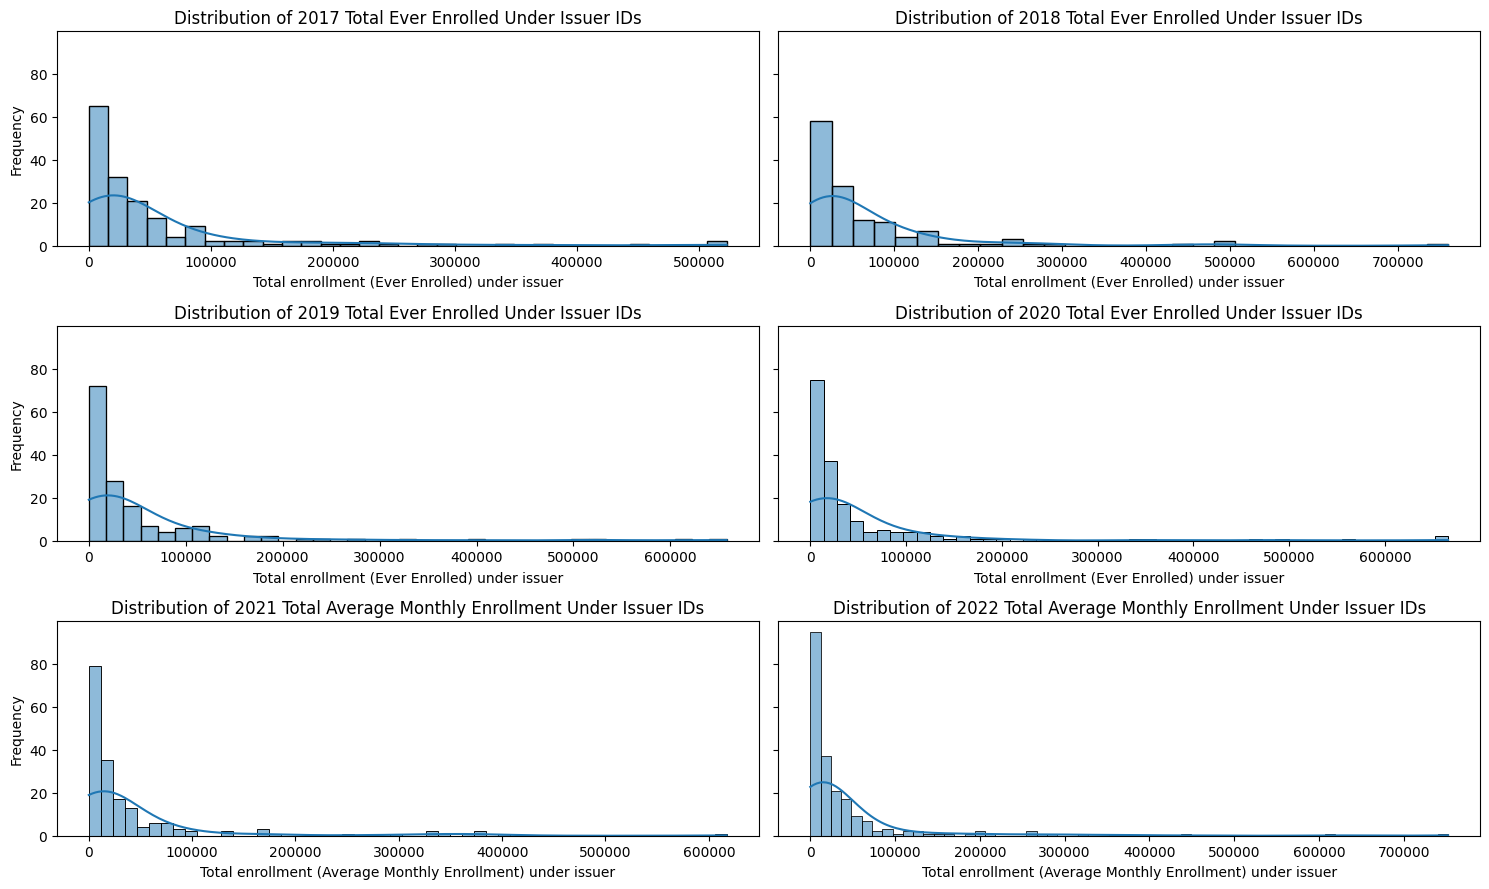

In [ ]:
# Histogram of Issuers 2total monthly (sum of all County's average monthly enrollment) enrollment over years
years = [2017, 2018, 2019, 2020, 2021, 2022]
fig, axes = plt.subplots(3, 2, figsize=(15, 9), sharey=True)

for i, year in enumerate(years):
    if year in range(2017, 2021):
        feature = 'Ever Enrolled'
    else:
        feature = 'Average Monthly Enrollment'

    df_sum_ever_enrolled = qhp[qhp['year'] == year].groupby(['Issuer HIOS ID'])[feature].sum().reset_index()

    sns.histplot(data=df_sum_ever_enrolled, x=feature, ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {year} Total {feature} Under Issuer IDs')
    axes[i//2, i%2].set_xlabel(f'Total enrollment ({feature}) under issuer')
    axes[i//2, i%2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Enrollment under issuer ID statistics
qhp[qhp['year'] == 2022].groupby(['Issuer HIOS ID'])['Average Monthly Enrollment'].sum().describe()

count       213.000000
mean      44754.746479
std       92972.870386
min           0.000000
25%        4381.000000
50%       14160.000000
75%       40816.000000
max      752421.000000
Name: Average Monthly Enrollment, dtype: float64

✍️ **Observations**

Great! We have data for:
- **39 states**
- **286 Issuer ID**
- **2727 County (by FIPS Code)**
- **Each issuer HIOS ID is only for one particular State. But one issuer HIOS ID can serve different counties in a state**.  Also, **each county can have different issuer HIOS ID options**. (Of course, each state can have different issuers).
Note 'County Name' and 'City in County' are from premium data. So, only 61 county and 62 City in County has premium information. This is expected because we only have total of 63 premium records! We probably won't use those two fields.

**Total enrollment under an Issuer's**
- First note an issuer using its unique HIOS issuer ID. But an entity’s issuer HIOS ID is state-specific, such that** a company offering plans through two different state **Exchanges appears as **two separate issuers**.  So, in some cases, **one parent company can have multiple HIOS issuer IDs**. But for simplicity, when we talk about an issuer in the project, we only look at the issuer id.
- From histogram above, **many issuers had small total enrollments** and the **issuers with large enrollments are long tailed**.
- The total enrollment under an issuer could be valuable information because it may tell something about the pool size. In general, the larger the pool, the easier to manager risks, the stablier the enrollments. Thus, we will merge this data to prediction data later. We want to **merge 2021 total issuer enrollment** instead of 2022 **to prediction data** because we won't know issuers' total enrollment before knowing the seperate enrollment across different counties.

## **Part 2.2: EDA for Aggregated Data**


#### **Create Data Frame - Aggregate by State and Year**

Want to analyze and see some state wise on different years. So, aggregate by state and yr.

In [ ]:
# Aggregated df by state and year
def nan_mean_no_zero(x):
    """Compute mean excluding NaN and 0 values from the denominator."""
    valid_values = x.dropna()
    valid_values = valid_values[valid_values != 0]  # Exclude 0 values
    if len(valid_values) > 0:
        return np.sum(valid_values) / len(valid_values)
    else:
        return np.nan

def nan_mean(x):
    """Compute mean excluding NaN values from the denominator."""
    valid_values = x.dropna()
    if len(valid_values) > 0:
        return np.sum(valid_values) / len(valid_values)
    else:
        return np.nan

def nan_sum(x):
    """Compute sum excluding NaN values."""
    valid_values = x.dropna()
    valid_values = valid_values[valid_values != 0]  # Exclude 0 values
    if len(valid_values) > 0:
        return np.sum(valid_values)
    else:
        return 0



agg_functions = {'Issuer HIOS ID': 'nunique',
                 'County FIPS Code': 'nunique',
                 'Average Number of Months Enrolled Per Consumer': nan_mean_no_zero,
                # 'Ever Enrolled': nan_mean_no_zero,
                # 'Average Monthly Enrollment': nan_mean_no_zero,
                 'Ever Enrolled': [nan_mean_no_zero,nan_sum],
                 'Average Monthly Enrollment': [nan_mean_no_zero,nan_sum],
                 'PY24': nan_mean_no_zero,
                 'PY23-PY24 Change': nan_mean_no_zero,
                 'PY20-PY24 5 Year Change': nan_mean_no_zero,
                 'Male_Female_Ratio': nan_mean,
                 'ages: 0-17 ratio': nan_mean,
                 'ages: 18-34 ratio':nan_mean,
                 'ages: 35-54 ratio': nan_mean,
                 'ages: 55+ ratio':nan_mean,
                 'fpl: < 138% ratio': nan_mean,
                 'fpl: >= 138% and <= 250% ratio': nan_mean,
                 'fpl: > 250% and <= 400% ratio':  nan_mean,
                 'fpl: > 400%ratio': nan_mean,
                 'smoker mo_enrolled ratio': nan_mean_no_zero,
                 'smoker ever_enrolled ratio': nan_mean_no_zero }


qhp_agg = qhp.groupby(['State', 'year']).agg(agg_functions).reset_index()


In [ ]:
qhp_agg.columns =['State', 'year', 'Issuer HIOS ID', 'County FIPS Code',
       'Average Number of Months Enrolled Per Consumer', 'Ever Enrolled','State total Ever Enrolled',
       'Average Monthly Enrollment', 'State total Average Monthly Enrollment',  'PY24', 'PY23-PY24 Change',
       'PY20-PY24 5 Year Change', 'Male_Female_Ratio', 'ages: 0-17 ratio',
       'ages: 18-34 ratio', 'ages: 35-54 ratio', 'ages: 55+ ratio',
       'fpl: < 138% ratio', 'fpl: >= 138% and <= 250% ratio',
       'fpl: > 250% and <= 400% ratio', 'fpl: > 400%ratio',
       'smoker mo_enrolled ratio', 'smoker ever_enrolled ratio']

#### **Create Data Frame - Aggregate by Year**
Now, agrregate by year because we also want to analyze overall yearly trend.

In [ ]:
# aggregate by year
qhp_agg_all = qhp_agg.groupby(['year']).agg(agg_functions).reset_index()
qhp_agg_all.columns =['year', 'Issuer HIOS ID', 'County FIPS Code',
       'Average Number of Months Enrolled Per Consumer', 'Ever Enrolled','State total Ever Enrolled',
       'Average Monthly Enrollment', 'State total Average Monthly Enrollment',  'PY24', 'PY23-PY24 Change',
       'PY20-PY24 5 Year Change', 'Male_Female_Ratio', 'ages: 0-17 ratio',
       'ages: 18-34 ratio', 'ages: 35-54 ratio', 'ages: 55+ ratio',
       'fpl: < 138% ratio', 'fpl: >= 138% and <= 250% ratio',
       'fpl: > 250% and <= 400% ratio', 'fpl: > 400%ratio',
       'smoker mo_enrolled ratio', 'smoker ever_enrolled ratio']

#### **Basic EDA on aggregated Data**

In [ ]:
# Aggregated Data size
print('Rows and Columns of aggregated data by state and year: ',qhp_agg.shape)
print('Rows and Columns of aggregated data by year: ',qhp_agg_all.shape)

Rows and Columns of aggregated data by state and year:  (224, 23)
Rows and Columns of aggregated data by year:  (6, 22)


✍️ **Observations**

So, we have **224 records** in aggregated data.

#### **Unique Issuer ID**

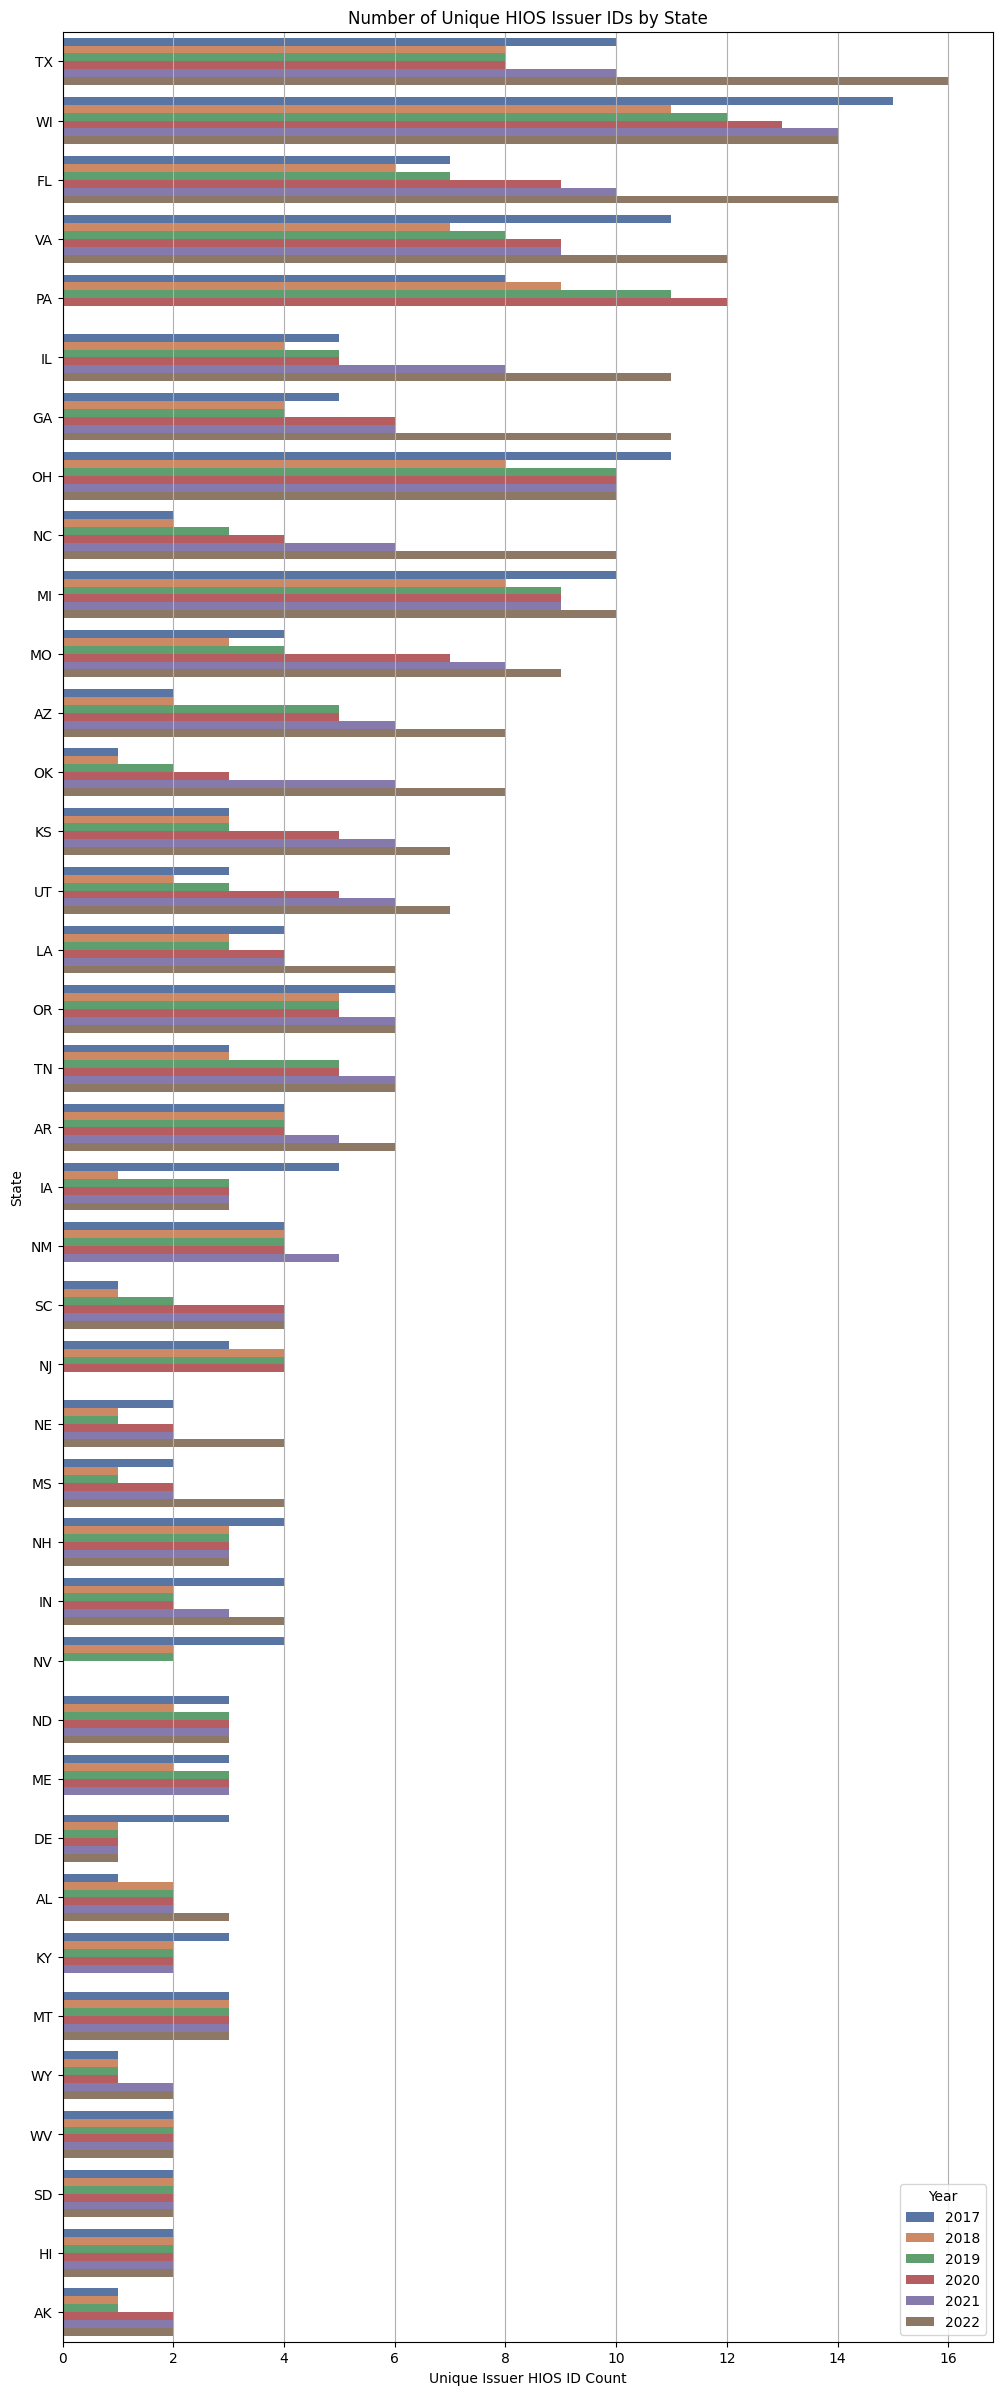

In [ ]:
# Plot Unique Issuer ID Count by State Plot
plt.figure(figsize=(12, 30))
qhp_agg_sorted = qhp_agg.sort_values(by=['Issuer HIOS ID'], ascending=[False])
sns.barplot(data=qhp_agg_sorted, x='Issuer HIOS ID', y='State', hue='year', palette='deep')

plt.title('Number of Unique HIOS Issuer IDs by State')
plt.xlabel('Unique Issuer HIOS ID Count')
plt.ylabel('State')
plt.grid(axis='x')
plt.legend(title='Year')
plt.xticks()
plt.show()

<Axes: title={'center': 'State Unique Issuer IDs - Overall Trend'}, xlabel='year'>

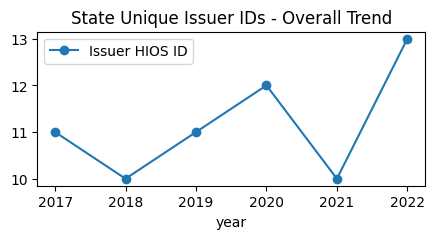

In [ ]:
# Line plot for overall yearly trend
qhp_agg_all.plot(x='year', y='Issuer HIOS ID', kind='line', marker='o', linestyle='-', title='State Unique Issuer IDs - Overall Trend',figsize=(5, 2))

In [ ]:
# Top 5 states with most unique Issuers

# function
def top_states_stats(df, feature, year, state_total_average=''):
    # Filter DataFrame for the specified year
    df_year = df[df['year'] == year]
    df_sorted = df_year.sort_values(by=[feature], ascending=False)

    # Print top 5 states with the most and least average enrollment for the specified year
    print(f"\nTop 5 States of {feature} in {year}{state_total_average}:\n", df_sorted.loc[:, ['State', feature]].head(5))
    print(f"\nLeast 5 States of {feature} in {year}{state_total_average}:\n", df_sorted.loc[:, ['State', feature]].tail(5))

top_states_stats(qhp_agg, 'Issuer HIOS ID', 2022)



Top 5 States of Issuer HIOS ID in 2022:
     State  Issuer HIOS ID
193    TX              16
35     FL              14
211    WI              14
205    VA              12
59     IL              11

Least 5 States of Issuer HIOS ID in 2022:
     State  Issuer HIOS ID
5      AK               2
181    SD               2
47     HI               2
223    WY               2
29     DE               1


#### **Ever Enrollment (2017 - 2020)**

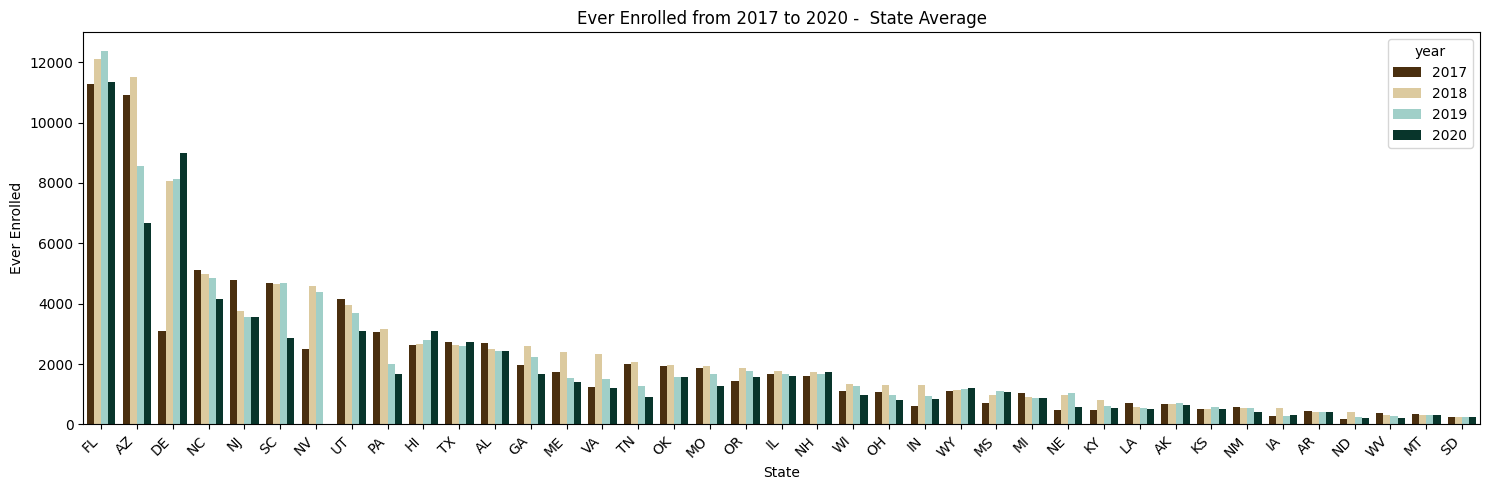

In [ ]:
# bar plot of individual states and years
def plot_avg_monthly_enrollment(df, y, palette=['gold', 'royalblue'], title=""):
    # Sort the DataFrame by the specified column in descending order
    qhp_agg_years_sorted = qhp_agg_years.sort_values(by=[y], ascending=False)

    # Plot
    plt.figure(figsize=(15, 5))
    sns.barplot(data=qhp_agg_years_sorted, x='State', y=y, hue='year', palette=palette)

    plt.title(f'{title}')
    plt.xlabel('State')
    plt.ylabel(f'{y}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()

# plot
qhp_agg_years = qhp_agg[qhp_agg['year'].isin(range(2017, 2021))]
plot_avg_monthly_enrollment(qhp_agg_years, 'Ever Enrolled', palette='BrBG',title ='Ever Enrolled from 2017 to 2020 -  State Average')


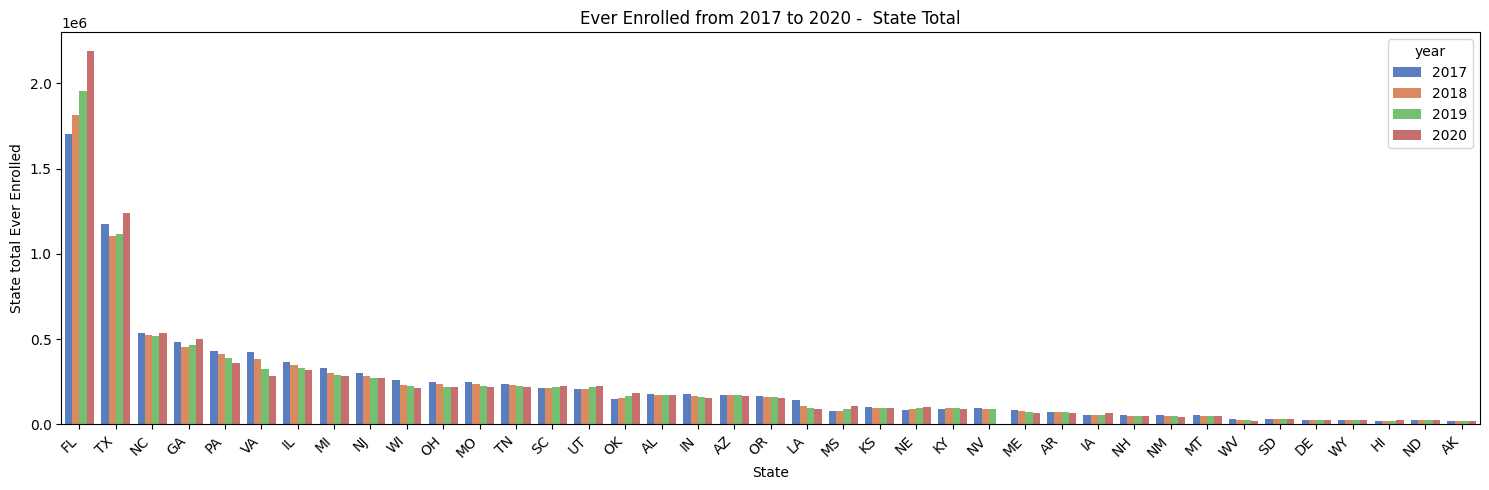

In [ ]:
plot_avg_monthly_enrollment(qhp_agg_years, 'State total Ever Enrolled', palette='muted',title ='Ever Enrolled from 2017 to 2020 -  State Total')

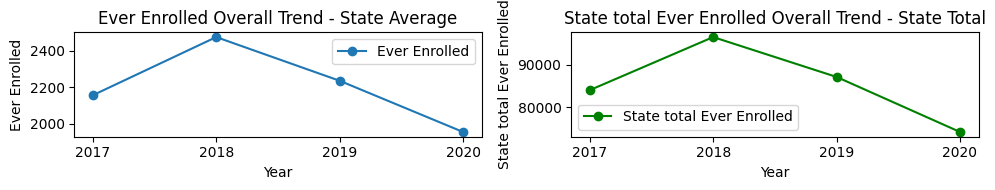

In [ ]:
# plot Overall trend
# function
def plot_dual_line(df, column1, column2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 2))

    # Plot first column
    df.plot(x='year', y=column1, kind='line', marker='o', linestyle='-', ax=axes[0])
    axes[0].set_title(f'{column1} Overall Trend - State Average')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel(column1)

    # Plot second column
    df.plot(x='year', y=column2, kind='line', marker='o', linestyle='-', color='green', ax=axes[1])
    axes[1].set_title(f'{column2} Overall Trend - State Total')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel(column2)

    for ax in axes:
        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

# plot
plot_dual_line(qhp_agg_all[  qhp_agg_all['year'].isin([2017,2018,2019,2020])], 'Ever Enrolled', 'State total Ever Enrolled')

In [ ]:
# Top 5 states of ever enrolled
top_states_stats(qhp_agg, 'Ever Enrolled', 2020, state_total_average=' - State Average')
top_states_stats(qhp_agg, 'Ever Enrolled', 2020, state_total_average=' - State Total')


Top 5 States of Ever Enrolled in 2020 - State Average:
     State  Ever Enrolled
33     FL   11342.642487
27     DE    8979.000000
21     AZ    6659.960000
115    NC    4170.255814
139    NJ    3563.473684

Least 5 States of Ever Enrolled in 2020 - State Average:
     State  Ever Enrolled
51     IA     297.600000
109    MT     295.591463
179    SD     258.132812
215    WV     220.298969
121    ND     218.063063

Top 5 States of Ever Enrolled in 2020 - State Total:
     State  Ever Enrolled
33     FL   11342.642487
27     DE    8979.000000
21     AZ    6659.960000
115    NC    4170.255814
139    NJ    3563.473684

Least 5 States of Ever Enrolled in 2020 - State Total:
     State  Ever Enrolled
51     IA     297.600000
109    MT     295.591463
179    SD     258.132812
215    WV     220.298969
121    ND     218.063063


In [ ]:
# Plot features in state map
# function
def plot_choropleth_maps(df, year, cols, titles, colors):
    # Loop through each column and create choropleth maps
    for col, color, title in zip(cols, colors, titles):
        # Filter DataFrame for the specified year
        qhp_agg_for_year = df[df['year'] == year]

        # Create choropleth map
        fig = px.choropleth(qhp_agg_for_year,
                            locations='State',
                            locationmode='USA-states',
                            color=col,
                            scope='usa',
                            hover_name='State',
                            color_continuous_scale=color,
                            labels={col: col},
                            title=title)

        # Update layout to set transparent background
        fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'))

        # Show the plot
        fig.show()

# Plot
cols = ['Ever Enrolled','State total Ever Enrolled']
titles = ['2017 Year Ever Enrolled - State Average','2020 Year Ever Enrolled - State Total']
colors = ['Greens','RdPu']
year = 2017

plot_choropleth_maps(qhp_agg, year, cols, titles, colors)

In [ ]:
# Plot features in state map
# function
def plot_choropleth_maps(df, year, cols, titles, colors):
    # Loop through each column and create choropleth maps
    for col, color, title in zip(cols, colors, titles):
        # Filter DataFrame for the specified year
        qhp_agg_for_year = df[df['year'] == year]

        # Create choropleth map
        fig = px.choropleth(qhp_agg_for_year,
                            locations='State',
                            locationmode='USA-states',
                            color=col,
                            scope='usa',
                            hover_name='State',
                            color_continuous_scale=color,
                            labels={col: col},
                            title=title)

        # Update layout to set transparent background
        fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'))

        # Show the plot
        fig.show()

# Plot
cols = ['Ever Enrolled','State total Ever Enrolled']
titles = ['2020 Year Ever Enrolled - State Average','2020 Year Ever Enrolled - State Total']
colors = ['Greens','RdPu']
year = 2020

plot_choropleth_maps(qhp_agg, year, cols, titles, colors)


In [ ]:
# Plot
cols = ['State total Ever Enrolled']
titles = ['2020 Year Ever Enrolled - State Total']
colors = ['RdPu']
year = 2020

plot_choropleth_maps(qhp_agg, year, cols, titles, colors)

✍️ **Observations**
- Top 5 states with the most ever enrolled in 2020 is **FL, DE, AZ, NC, and NJ**.
- Top 5 states with the least ever enrolled in 2020 is **IA, MT, SD, WV, and ND**.
- There is a huge gap from those on top and at the bottom. So, the **range** of **average ever enrolled across the states** in the U.S is **pretty wide**.
- Overall in U.S, it seems there is an increase of enrollment from 2017 to 2018, and a drop from 2018 to 2019, and from 2019 to 2020. From individual County, we can see this trend for some states but not for all. This is interesting because Covid starts during 2019. So, covid might affect enrollment in a negative way for some states but not for others.

- **DE** is a state with very high average enrollment but very low total enrollment. The reason is probably it's a very small state!


#### **Average Monthly Enrollment (2021 & 2022)**

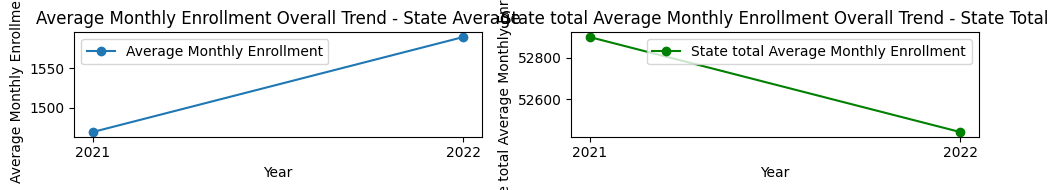

In [ ]:
# Line plot for overall yearly trend
plot_dual_line(qhp_agg_all[  qhp_agg_all['year'].isin([2021,2022])], 'Average Monthly Enrollment', 'State total Average Monthly Enrollment')

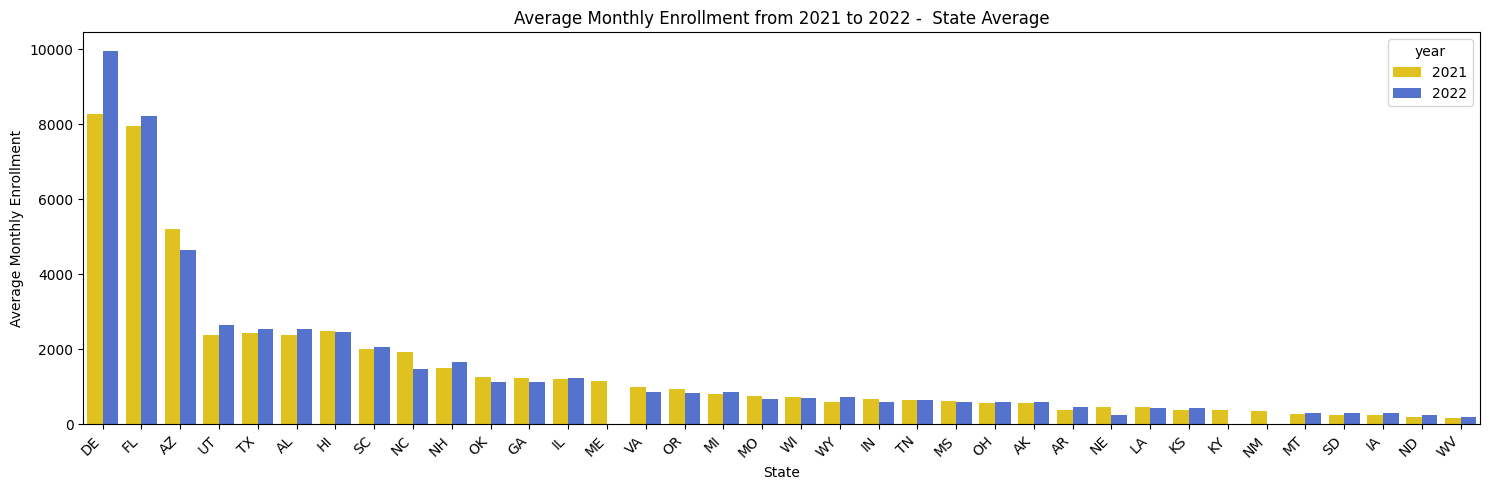

In [ ]:
# bar plot of individual states and years
qhp_agg_years = qhp_agg[qhp_agg['year'].isin([2021, 2022])]
plot_avg_monthly_enrollment(qhp_agg_years, 'Average Monthly Enrollment', palette=['gold', 'royalblue'],title ='Average Monthly Enrollment from 2021 to 2022 -  State Average')


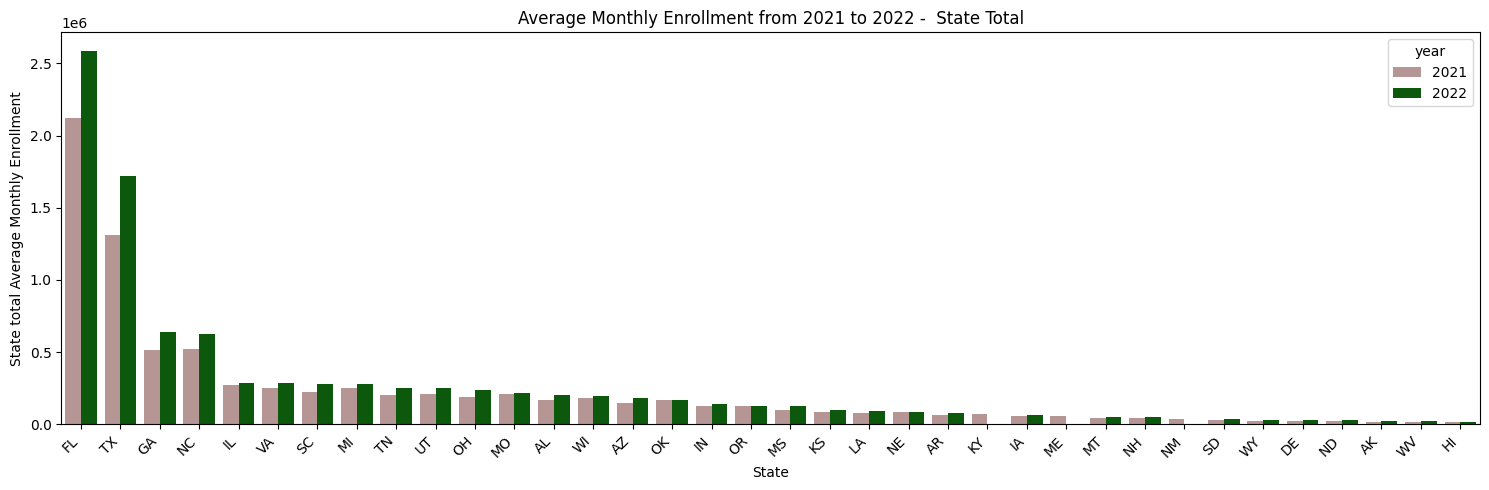

In [ ]:
plot_avg_monthly_enrollment(qhp_agg_years, 'State total Average Monthly Enrollment', palette=['rosybrown', 'darkgreen'], title ='Average Monthly Enrollment from 2021 to 2022 -  State Total')



In [ ]:
# Top 5 States with Average Monthly Enrollment
top_states_stats(qhp_agg, 'Average Monthly Enrollment', 2022, state_total_average=' - State Average')
top_states_stats(qhp_agg, 'State total Average Monthly Enrollment', 2022, state_total_average=' - State Total')


Top 5 States of Average Monthly Enrollment in 2022 - State Average:
     State  Average Monthly Enrollment
29     DE                 9957.000000
35     FL                 8235.493631
23     AZ                 4660.051282
199    UT                 2655.642105
193    TX                 2537.745938

Least 5 States of Average Monthly Enrollment in 2022 - State Average:
     State  Average Monthly Enrollment
181    SD                  308.007812
53     IA                  306.251121
129    NE                  263.213650
123    ND                  252.652174
217    WV                  198.575472

Top 5 States of State total Average Monthly Enrollment in 2022 - State Total:
     State  State total Average Monthly Enrollment
35     FL                               2585945.0
193    TX                               1718054.0
41     GA                                638297.0
117    NC                                627842.0
59     IL                                288111.0

Least 5 States of Sta

In [ ]:
# Averge Monthly Enrollment
cols = ['Average Monthly Enrollment']
titles = ['2022 Year Average Monthly Enrollment - State Average']
colors = ['Blues']
year = 2022

plot_choropleth_maps(qhp_agg, year, cols, titles, colors)

✍️ **Observations**
- Top 5 states with the most Average Monthly Enrollment in 2022 is **DE, FL, AZ,UT, and TX**.
- Top 5 states with the least Average Monthly Enrollment in 2022 is **SD, IA, NE, ND, and WV**.
- There is a huge gap from those on top and at the bottom. So, the **range** of **average monthly enrolled across the states** in the U.S is **pretty wide**.
- Overall in U.S, it seems there is an increase of enrollment from 2021 to 2022. From individual County, we can see this trend for some states but not for all. This is interesting because Covid was still recovering in 2021 to 2022. This may affect different states differently.
- States ME, KY, NM had some average enrollment in 2021 but average enrollments drop to 0 in 2022. Why those drops happend? Are enrollment still available for people in those states? Is this because data not get record for those years? Those are examples of unusall event that might be worth for investigating.


#### **Average Number of Months Enrolled Per Consumer (2021 & 2022)**

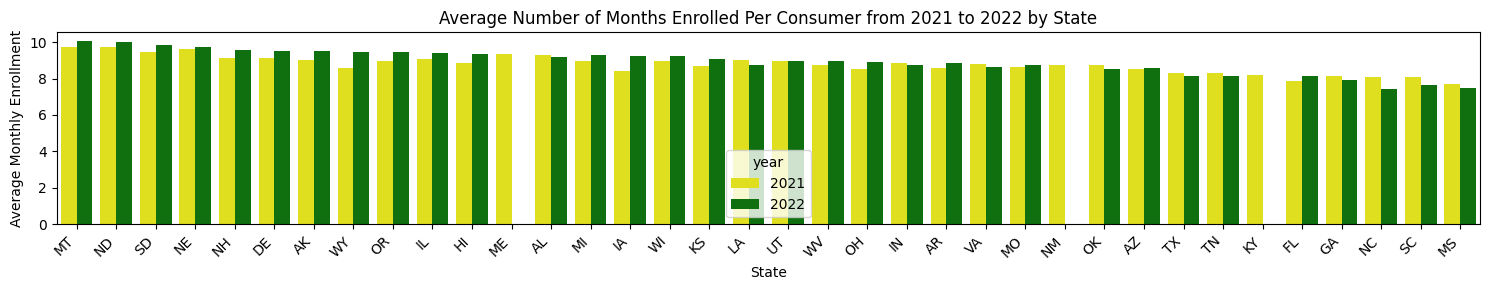

In [ ]:
# Average number of Months enrolled per consumer for 2021 & 2022
qhp_agg_years = qhp_agg[qhp_agg['year'].isin([2021, 2022])]

# Sort the DataFrame by the average monthly enrollment values in descending order
qhp_agg_years_sorted = qhp_agg_years.sort_values(by=['Average Number of Months Enrolled Per Consumer'], ascending=[False])

#Plot
plt.figure(figsize=(15, 3))
sns.barplot(data=qhp_agg_years_sorted, x='State', y='Average Number of Months Enrolled Per Consumer', hue='year', palette=['yellow','green'])

plt.title('Average Number of Months Enrolled Per Consumer from 2021 to 2022 by State')
plt.xlabel('State')
plt.ylabel('Average Monthly Enrollment')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


In [ ]:
# Top 5 states of Average Number of Months Enrolled Per Consumer
top_states_stats(qhp_agg, 'Average Number of Months Enrolled Per Consumer', 2022, state_total_average=' - State Average')



Top 5 States of Average Number of Months Enrolled Per Consumer in 2022 - State Average:
     State  Average Number of Months Enrolled Per Consumer
111    MT                                       10.031613
123    ND                                       10.011304
181    SD                                        9.822656
129    NE                                        9.711869
135    NH                                        9.562069

Least 5 States of Average Number of Months Enrolled Per Consumer in 2022 - State Average:
     State  Average Number of Months Enrolled Per Consumer
35     FL                                        8.133439
41     GA                                        7.938393
175    SC                                        7.670073
105    MS                                        7.472986
117    NC                                        7.436620


✍️ **Observation**
-  The average number of months enrolled per consumer doesn't seem to vary too much by states.
- Overall, it seems lots of states in top 5 states with the longest average number of months enrolled per consumer are states with less issuer and less enrollments. So, there might be:
  - A **negative correlation** between **months consumers stay** and **number of unique issuers** in the state
  - A **negative correlation** between **months consumers stay** and **enrollments** in the state
  - Those make sense because usually when consumers don't have many choices, they tend to stay longer.
- simliar to 2020, small state DE has very high average enrollment but low total enrollment

#### **2024 Premiums and Premiums Increases**

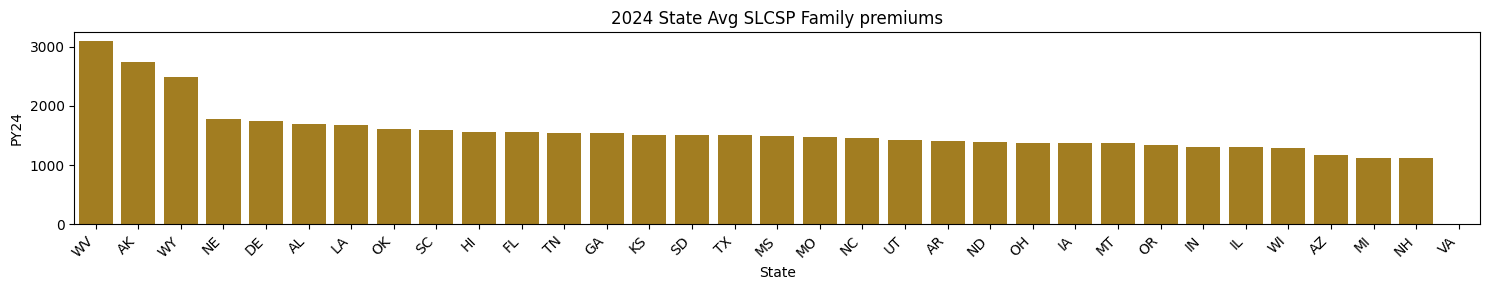

In [ ]:
# Bar plot for 2024 premium
def barplot_prem(df, y, palette=['gold', 'royalblue'], title=""):
    # Sort the DataFrame by the specified column in descending order
    qhp_agg_years_sorted = qhp_agg_years.sort_values(by=[y], ascending=False)

    # Plot
    plt.figure(figsize=(15, 3))
    sns.barplot(data=qhp_agg_years_sorted, x='State', y=y, palette=palette)

    plt.title(f'{title}')
    plt.xlabel('State')
    plt.ylabel(f'{y}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()
qhp_agg_years = qhp_agg[qhp_agg['year']==2022]
barplot_prem(qhp_agg_years, 'PY24', palette=['darkgoldenrod'], title ='2024 State Avg SLCSP Family premiums')


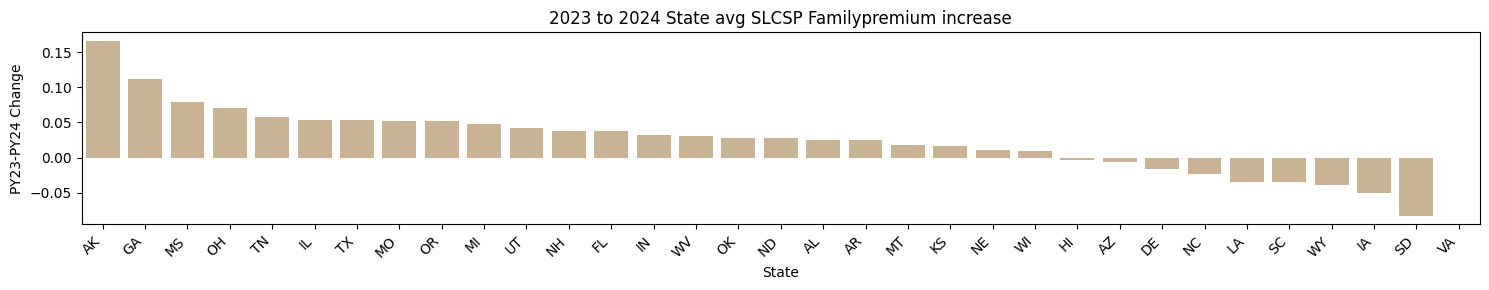

In [ ]:
# Bar plot for 2023 to 2024 premium Incraes
qhp_agg_years = qhp_agg[qhp_agg['year']==2022]
barplot_prem(qhp_agg_years, 'PY23-PY24 Change', palette=['tan'], title ='2023 to 2024 State avg SLCSP Familypremium increase')


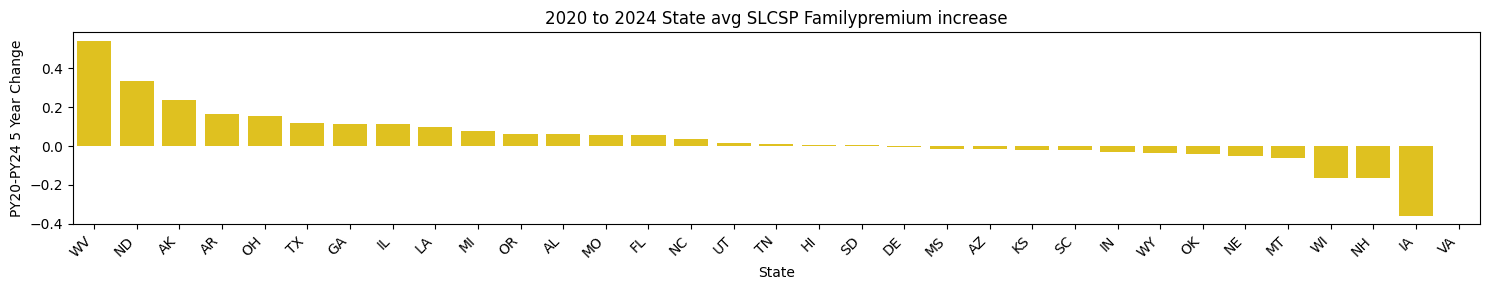

In [ ]:
# Bar plot for 2020 to 2024 premium Increase
qhp_agg_years = qhp_agg[qhp_agg['year']==2022]
barplot_prem(qhp_agg_years, 'PY20-PY24 5 Year Change', palette=['gold'], title ='2020 to 2024 State avg SLCSP Familypremium increase')

In [ ]:
# Top 5 states of Average Number of Months Enrolled Per Consumer
def top_prem_stats(df, feature, year, state_total_average=''):
    # Filter DataFrame for the specified year
    df_year = df[df['year'] == year]
    df_sorted = df_year.sort_values(by=[feature], ascending=False)

    # Print top 5 states with the most and least average enrollment for the specified year
    print(f"\nTop 5 States of highest 2024 Avg family SLCSP premiums:\n", df_sorted.loc[:, ['State', feature]].head(5))
    print(f"\nLeast 5 States of highest 2024 Avg family SLCSP premiums:\n", df_sorted.loc[:, ['State', feature]].tail(5))


top_prem_stats(qhp_agg, 'PY24', 2022, state_total_average=' ')


Top 5 States of highest 2024 Avg family SLCSP premiums:
     State         PY24
217    WV  3088.822086
5      AK  2744.210000
223    WY  2496.640000
129    NE  1773.220000
29     DE  1742.300000

Least 5 States of highest 2024 Avg family SLCSP premiums:
     State         PY24
211    WI  1285.240000
23     AZ  1167.206154
93     MI  1128.057707
135    NH  1124.260000
205    VA          NaN


In [ ]:
# Premium map
cols=['PY24', 'PY23-PY24 Change', 'PY20-PY24 5 Year Change']
titles = ['2024 Family Premium', '2023-2024 SLCSP Family Premium Increase' ,'2020-2024 Family Premium Increase']
colors=['Greens','RdPu','OrRd']
year = 2022

plot_choropleth_maps(qhp_agg, year, cols, titles, colors)

#### **Top 5 Enrollments and Top Premium (increase) States**

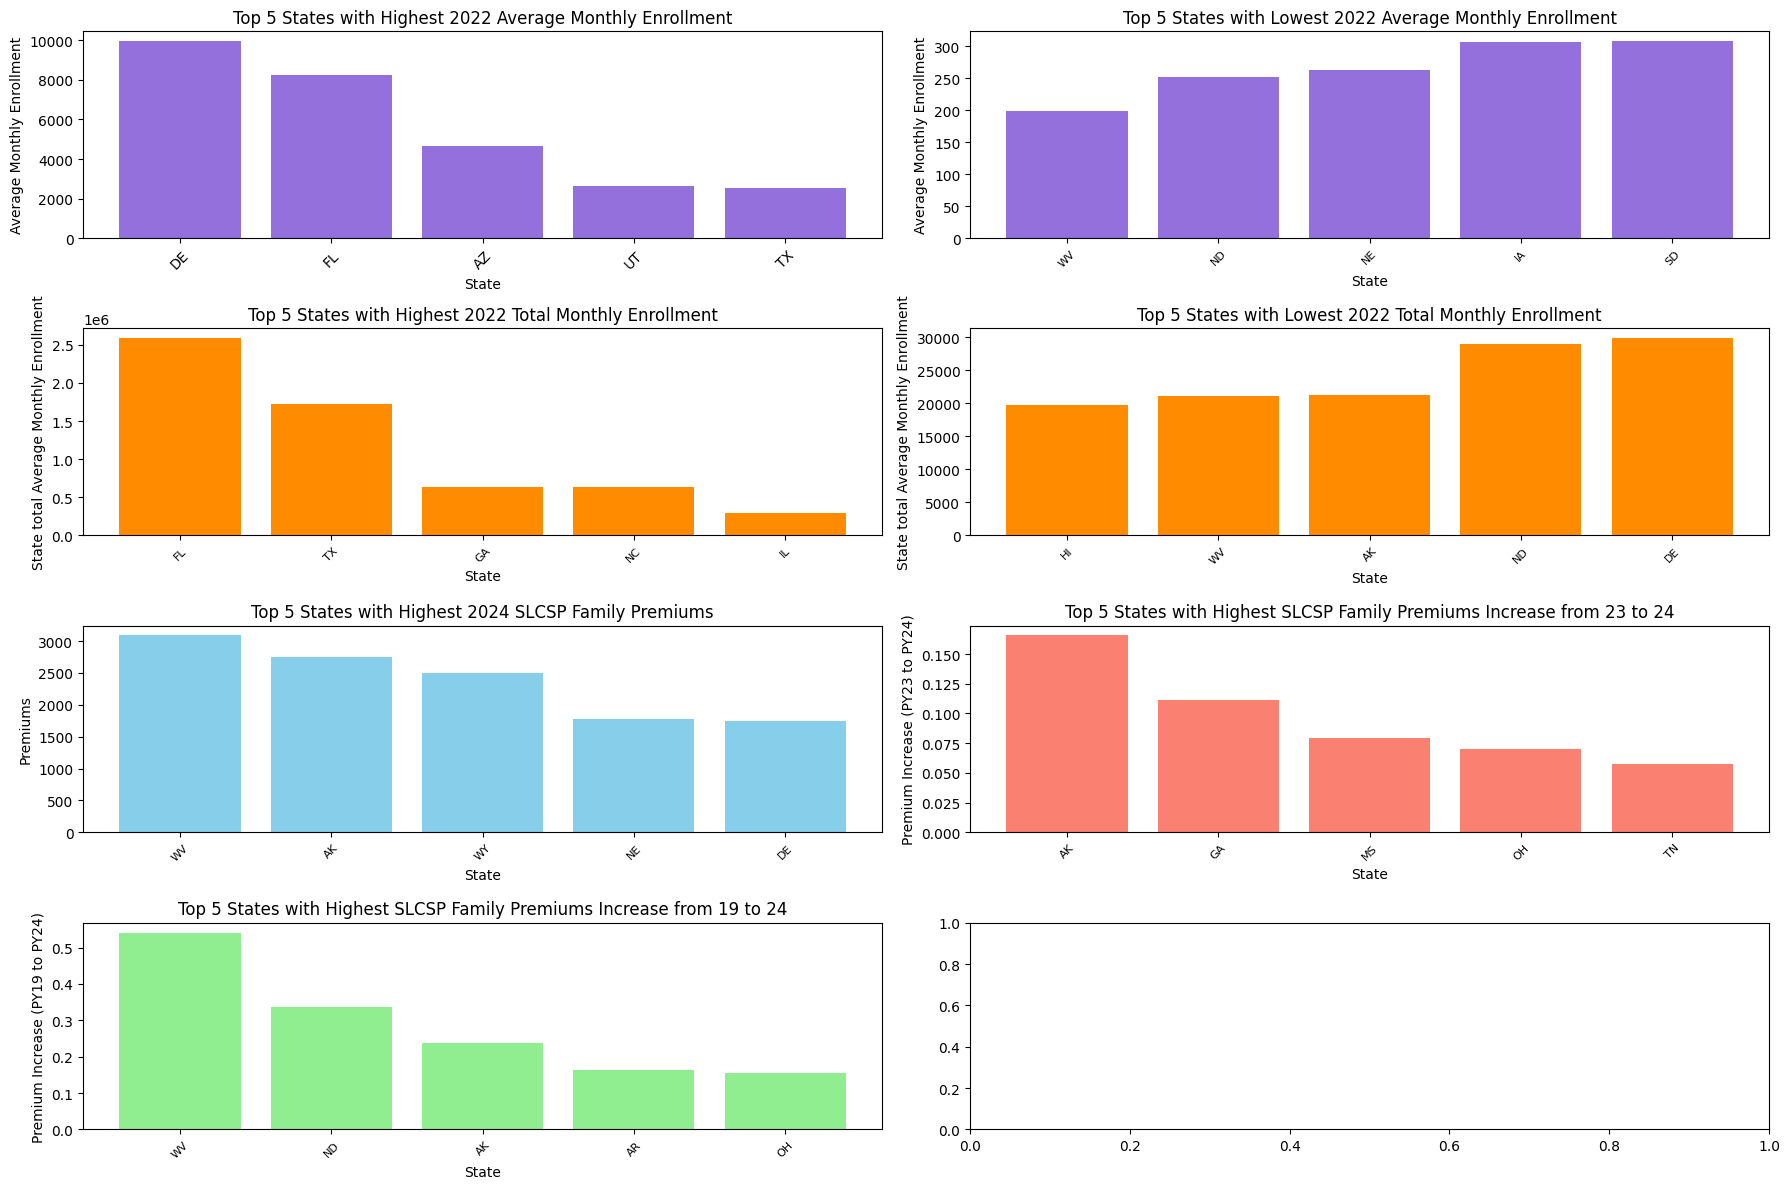

In [ ]:
# 2022 Bar chart of top highest premiums 5 states
qhp_agg_for_year = qhp_agg[qhp_agg['year'] == 2022]

qhp_sorted_enroll= qhp_agg_for_year.sort_values(by='Average Monthly Enrollment', ascending=False)
top_5_states_enroll = qhp_sorted_enroll.head(5)
qhp_sorted_enroll_rev= qhp_agg_for_year.sort_values(by='Average Monthly Enrollment', ascending=True)
top_5_states_enroll_rev = qhp_sorted_enroll_rev.head(5)

qhp_sorted_enroll_st= qhp_agg_for_year.sort_values(by='State total Average Monthly Enrollment', ascending=False)
top_5_states_enroll_st = qhp_sorted_enroll_st.head(5)
qhp_sorted_enroll_rev_st= qhp_agg_for_year.sort_values(by='State total Average Monthly Enrollment', ascending=True)
top_5_states_enroll_rev_st = qhp_sorted_enroll_rev_st.head(5)

qhp_sorted_prem = qhp_agg_for_year.sort_values(by='PY24', ascending=False)
top_5_states_prem = qhp_sorted_prem.head(5)
qhp_sorted_premInc = qhp_agg_for_year.sort_values(by='PY23-PY24 Change', ascending=False)
top_5_states_premInc = qhp_sorted_premInc.head(5)
qhp_sorted_premInc5 = qhp_agg_for_year.sort_values(by='PY20-PY24 5 Year Change', ascending=False)
top_5_states_premInc5 = qhp_sorted_premInc5.head(5)

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(18, 12))

# Plot for top 5 2022 Highest Ave monthly enrollment
axes[0,0].bar(top_5_states_enroll['State'], top_5_states_enroll['Average Monthly Enrollment'], color='mediumpurple')
axes[0,0].set_title('Top 5 States with Highest 2022 Average Monthly Enrollment')
axes[0,0].set_xlabel('State')
axes[0,0].set_ylabel('Average Monthly Enrollment')
axes[0,0].tick_params(axis='x', rotation=45, labelsize=10)

# Plot for top 5 2022 Lowest Ave monthly enrollment
axes[0,1].bar(top_5_states_enroll_rev['State'], top_5_states_enroll_rev['Average Monthly Enrollment'], color='mediumpurple')
axes[0,1].set_title('Top 5 States with Lowest 2022 Average Monthly Enrollment')
axes[0,1].set_xlabel('State')
axes[0,1].set_ylabel('Average Monthly Enrollment')
axes[0,1].tick_params(axis='x', rotation=45, labelsize=8)

# Plot for top 5 2022 Highest Total monthly enrollment
axes[1,0].bar(top_5_states_enroll_st['State'], top_5_states_enroll_st['State total Average Monthly Enrollment'], color='darkorange')
axes[1,0].set_title('Top 5 States with Highest 2022 Total Monthly Enrollment')
axes[1,0].set_xlabel('State')
axes[1,0].set_ylabel('State total Average Monthly Enrollment')
axes[1,0].tick_params(axis='x', rotation=45, labelsize=8)

# Plot for top 5 2022 Lowest Total monthly enrollment
axes[1,1].bar(top_5_states_enroll_rev_st['State'], top_5_states_enroll_rev_st['State total Average Monthly Enrollment'], color='darkorange')
axes[1,1].set_title('Top 5 States with Lowest 2022 Total Monthly Enrollment')
axes[1,1].set_xlabel('State')
axes[1,1].set_ylabel('State total Average Monthly Enrollment')
axes[1,1].tick_params(axis='x', rotation=45, labelsize=8)

# Plot for top 5 states with highest premiums
axes[2,0].bar(top_5_states_prem['State'], top_5_states_prem['PY24'], color='skyblue')
axes[2,0].set_title('Top 5 States with Highest 2024 SLCSP Family Premiums')
axes[2,0].set_xlabel('State')
axes[2,0].set_ylabel('Premiums')
axes[2,0].tick_params(axis='x', rotation=45, labelsize=8)

# Plot for top 5 states with highest increase from 23 to 24
axes[2,1].bar(top_5_states_premInc['State'], top_5_states_premInc['PY23-PY24 Change'], color='salmon')
axes[2,1].set_title('Top 5 States with Highest SLCSP Family Premiums Increase from 23 to 24')
axes[2,1].set_xlabel('State')
axes[2,1].set_ylabel('Premium Increase (PY23 to PY24)')
axes[2,1].tick_params(axis='x', rotation=45, labelsize=8)

# Plot for top 5 states with highest increase from 19 to 24
axes[3,0].bar(top_5_states_premInc5['State'], top_5_states_premInc5['PY20-PY24 5 Year Change'], color='lightgreen')
axes[3,0].set_title('Top 5 States with Highest SLCSP Family Premiums Increase from 19 to 24')
axes[3,0].set_xlabel('State')
axes[3,0].set_ylabel('Premium Increase (PY19 to PY24)')
axes[3,0].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

✍️ **Observation**

- Overall, it seems lots of states in top 5 states with the highest premium or premium increase are states with lower enrollments. So, there might be a **negative correlation** between **premium**or **premium increas** and **enrollment**


#### **Demographic Features on Map**

In [ ]:
# 2022 Demographic, Socioeconomic , smoker ratio features  map
cols=['Male_Female_Ratio','ages: 0-17 ratio','ages: 55+ ratio','fpl: < 138% ratio','fpl: > 400%ratio','smoker mo_enrolled ratio']
titles = ['2022 Male_Female_Ratio','2022 ages: 0-17 ratio','2022 ages: 55+ ratio','2022 fpl: < 138% ratio','fpl: > 400%ratio','2022 smoker mo_enrolled ratio']
colors=['GnBu','Oranges',"Blues",'Reds','Purples','YlGn']
year = 2022

plot_choropleth_maps(qhp_agg, year, cols, titles, colors)

**✍️ Observations**
Let's just list some top 3 states of demographic features:
- Highest male/femal ratio: NE, AK, SD
- Highest kids (less than 17 years) ratio: ND, UT, NE
- Highest 55+ age ratio: WV. WI, OH
- Highest FPL less than 138% ratio: MS, SC, TX
- Highest FPL greater than 400% ratio:OR, DE, NH
- Highest smoker ratio: IA, SD, WI

# **Part 3: Modeling Data - Create Data Frame, EDA, and Preprocessing**

## **Part 3.1: Create Data Frame for Modeling**

#### **Rename columns**

In [ ]:
# In EDA data, we have a "year" column and same feature would be in the same column (yearly data stack on each other)
# Now, for modeling, each yearly data is a different feature, so want to rename them.
QHP_2021.rename(columns={'Average Monthly Enrollment': 'Average Monthly Enrollment 2021'}, inplace=True)
QHP_2020.rename(columns={'Ever Enrolled': 'Ever Enrolled 2020'}, inplace=True)
QHP_2019.rename(columns={'Ever Enrolled': 'Ever Enrolled 2019'}, inplace=True)
QHP_2018.rename(columns={'Ever Enrolled': 'Ever Enrolled 2018'}, inplace=True)
QHP_2017.rename(columns={'Ever Enrolled': 'Ever Enrolled 2017'}, inplace=True)

#### **Creat Data Frame**
- We have non-aggregated data frame (with different years' data stack on each other). For demographic data, we only want to use the most recent year (2022 year), so, we exclude other years' rows first and keep only 2022 records. This is the "base" of our data frame for modeling.
- Then, we merge issuer enrollment data from years 2017-2020 (as 5 individual columns) to our modeling data frame.
- As discussed in non-aggregated EDA, total enrollment of each issuer HIOS ID can be valuable information for prediction. We will merge them too.

In [ ]:
# Create data frame for modeling
# Start with qhp, but will only 2022 records
qhp_copy=qhp[qhp['year']==2022]
print("qhp 2022 before merge: ", qhp_copy.shape)

# Merge enrollment information for each year into df_model
df_model = pd.merge(qhp_copy, QHP_2021[['State','Issuer HIOS ID','County FIPS Code','Average Monthly Enrollment 2021']], on=['State','Issuer HIOS ID','County FIPS Code'], how='left', suffixes=('', '_2021'))
df_model = pd.merge(df_model, QHP_2020[['State','Issuer HIOS ID','County FIPS Code','Ever Enrolled 2020']], on=['State','Issuer HIOS ID','County FIPS Code'], how='left', suffixes=('', '_2020'))
df_model = pd.merge(df_model, QHP_2019[['State','Issuer HIOS ID','County FIPS Code','Ever Enrolled 2019']], on=['State','Issuer HIOS ID','County FIPS Code'], how='left', suffixes=('', '_2019'))
df_model = pd.merge(df_model, QHP_2018[['State','Issuer HIOS ID','County FIPS Code','Ever Enrolled 2018']], on=['State','Issuer HIOS ID','County FIPS Code'], how='left', suffixes=('', '_2018'))
df_model = pd.merge(df_model, QHP_2017[['State','Issuer HIOS ID','County FIPS Code','Ever Enrolled 2017']], on=['State','Issuer HIOS ID','County FIPS Code'], how='left', suffixes=('', '_2017'))

# Merge 2021 issuer total average month enrollments
df_sum_ever_enrolled = qhp[qhp['year']==2021].groupby(['year', 'Issuer HIOS ID'])['Average Monthly Enrollment'].sum().reset_index()
df_sum_ever_enrolled.columns=['year','Issuer HIOS ID','Issuer Total 2021 Average Monthly Enrollment']
df_model = pd.merge(df_model, df_sum_ever_enrolled[['Issuer HIOS ID', 'Issuer Total 2021 Average Monthly Enrollment']], on='Issuer HIOS ID', how='left')

# Merge 2021 State total average month enrollments
df_sum_ever_enrolled = qhp[qhp['year']==2021].groupby(['year', 'State'])['Average Monthly Enrollment'].sum().reset_index()
df_sum_ever_enrolled.columns=['year','State','State Total 2021 Average Monthly Enrollment']
df_model = pd.merge(df_model, df_sum_ever_enrolled[['State', 'State Total 2021 Average Monthly Enrollment']], on='State', how='left')

# Merge 2021 County total average month enrollments
df_sum_ever_enrolled = qhp[qhp['year']==2021].groupby(['year', 'County FIPS Code'])['Average Monthly Enrollment'].sum().reset_index()
df_sum_ever_enrolled.columns=['year', 'County FIPS Code','County Total 2021 Average Monthly Enrollment']
df_model = pd.merge(df_model, df_sum_ever_enrolled[[ 'County FIPS Code', 'County Total 2021 Average Monthly Enrollment']], on= 'County FIPS Code', how='left')

# Print the shape of the resulting DataFrame
print("df_model shape (after merge): ", df_model.shape)


qhp 2022 before merge:  (7988, 23)
df_model shape (after merge):  (7988, 31)


In [ ]:
# drop useless columns in df_model, and rename columns
df_model.drop(columns=['year','Ever Enrolled','County Name','City in County','smoker ever_enrolled ratio'],inplace=True)
df_model.rename(columns={'Average Monthly Enrollment': 'Average Monthly Enrollment 2022'}, inplace=True)

In [ ]:
# Delete data frames not needed to save RAM.
# del QHP_2021, QHP_2020, QHP_2019, QHP_2018,QHP_2017,  qhp, qhp_copy

## **Part 3.2: EDA and Preprocessing on Modeling Data**

#### **Missing Values in Modeling Data**

In [ ]:
# Check missing values in modeling data
df_model.isna().sum()

State                                                0
Issuer HIOS ID                                       0
County FIPS Code                                     0
Average Monthly Enrollment 2022                      0
Average Number of Months Enrolled Per Consumer     841
Male_Female_Ratio                                 1306
ages: 0-17 ratio                                  1312
ages: 18-34 ratio                                 1312
ages: 35-54 ratio                                 1312
ages: 55+ ratio                                   1312
fpl: < 138% ratio                                 1180
fpl: >= 138% and <= 250% ratio                    1180
fpl: > 250% and <= 400% ratio                     1180
fpl: > 400%ratio                                  1180
smoker mo_enrolled ratio                           841
PY24                                              7654
PY23-PY24 Change                                  7654
PY20-PY24 5 Year Change                           7654
Average Mo

In [ ]:
# Issuers HIOS ID in 2022 but not in 2021
df_model[df_model['Issuer Total 2021 Average Monthly Enrollment'].isna()]['Issuer HIOS ID'].unique()

array([69461, 15724, 23435, 32311, 68398, 86382, 92120, 66966, 15105,
       43802, 90617, 82824, 38146, 11574, 32355, 42529, 35755, 34368,
       32542, 69842, 61604, 71667, 58996, 48161, 14624, 56766, 44007,
       61671, 77320, 17414, 54332, 26289, 57424, 45480, 91538, 62505,
       17933, 58840, 87226, 40220, 98312, 63251, 39889, 25928, 86443,
       38234])

Doubled check in the raw Excel file and those are indeed issuers HIOS ID in 2022 but not in 2021. Let's see the percentage of new issuers in 2022 not in 2021

In [ ]:
# % of Issuers HIOS ID in 2022 but not in 2021
issuers2022_not_in_2021 = len(df_model[df_model['Issuer Total 2021 Average Monthly Enrollment'].isna()]['Issuer HIOS ID'].unique())
issuers2022 = len(df_model['Issuer HIOS ID'].unique())
print("percent of new issuers in 2022 not in 2021: ",issuers2022_not_in_2021/issuers2022 )

percent of new issuers in 2022 not in 2021:  0.215962441314554


#### Replace missing values with state average
It may not make sense the best but machine learning models can't deal with missing values. Let's first fill missing values with state average.

In [ ]:
# Replace missing values in the column with the corresponding state average
cols=[c for c in df_model.columns if c not in ['State','Issuer HIOS ID','County FIPS Code','Average Monthly Enrollment 2022']]
state_avg = df_model.groupby('State')[cols].mean()
for col in cols:
    for state, avg_value in state_avg[col].items():
        mask = (df_model['State'] == state) & df_model[col].isna()
        df_model.loc[mask, col] = avg_value


In [ ]:
df_model.isna().sum()

State                                               0
Issuer HIOS ID                                      0
County FIPS Code                                    0
Average Monthly Enrollment 2022                     0
Average Number of Months Enrolled Per Consumer      0
Male_Female_Ratio                                 342
ages: 0-17 ratio                                    0
ages: 18-34 ratio                                   0
ages: 35-54 ratio                                   0
ages: 55+ ratio                                     0
fpl: < 138% ratio                                   0
fpl: >= 138% and <= 250% ratio                      0
fpl: > 250% and <= 400% ratio                       0
fpl: > 400%ratio                                    0
smoker mo_enrolled ratio                            0
PY24                                              372
PY23-PY24 Change                                  372
PY20-PY24 5 Year Change                           372
Average Monthly Enrollment 2

#### For the left-over missing values, drop the rows.
There are some state with no information for some columns (male/female ratio and premium columns). Let's just drop those rows.

In [ ]:
# drop rows still with missing values
df_model.dropna(inplace=True)
print('missing values: ', df_model.isna().sum().sum())
print('rows and columns after deleting misssign values: ', df_model.shape)

missing values:  0
rows and columns after deleting misssign values:  (7341, 26)


#### **Inifinite values**

In [ ]:
# check infinite values
df_model.isin([float('inf'), float('-inf')]).sum()

State                                             0
Issuer HIOS ID                                    0
County FIPS Code                                  0
Average Monthly Enrollment 2022                   0
Average Number of Months Enrolled Per Consumer    0
Male_Female_Ratio                                 5
ages: 0-17 ratio                                  0
ages: 18-34 ratio                                 0
ages: 35-54 ratio                                 0
ages: 55+ ratio                                   0
fpl: < 138% ratio                                 0
fpl: >= 138% and <= 250% ratio                    0
fpl: > 250% and <= 400% ratio                     0
fpl: > 400%ratio                                  0
smoker mo_enrolled ratio                          0
PY24                                              0
PY23-PY24 Change                                  0
PY20-PY24 5 Year Change                           0
Average Monthly Enrollment 2021                   0
Ever Enrolle

In [ ]:
# Replace inifinite values with avg
mean_value = np.nanmean(df_model['Male_Female_Ratio'][np.isfinite(df_model['Male_Female_Ratio'])])
df_model['Male_Female_Ratio'] = df_model['Male_Female_Ratio'].replace([np.inf, -np.inf], mean_value)

#### **Remove special charactors in column names**

It seems sklearn cannot process special charactors in columns names. Let's remove them.

In [ ]:
# Remove special charactors in column names
for i, feature_name in enumerate(df_model.columns):
    if re.search(r'[^a-zA-Z0-9_]', feature_name):
        new_feature_name = re.sub(r'[^a-zA-Z0-9_]', '', feature_name)
        new_feature_name = re.sub(r'\s+', '  ', new_feature_name)  # Remove extra spaces
        new_feature_name = new_feature_name.strip()  # Remove leading and trailing spaces
        df_model.rename(columns={feature_name: new_feature_name}, inplace=True)

#### **Train/Test Split**
Before EDA for modeling data, let's do train/test split. We'll only do EDA on training data.

In [ ]:
# Train Test Split
train,test = train_test_split(df_model, test_size=0.2, random_state=100)

#### **Dependent Variable Distribution**
For most machine learning modeling, it's important to check dependent variable distributions.

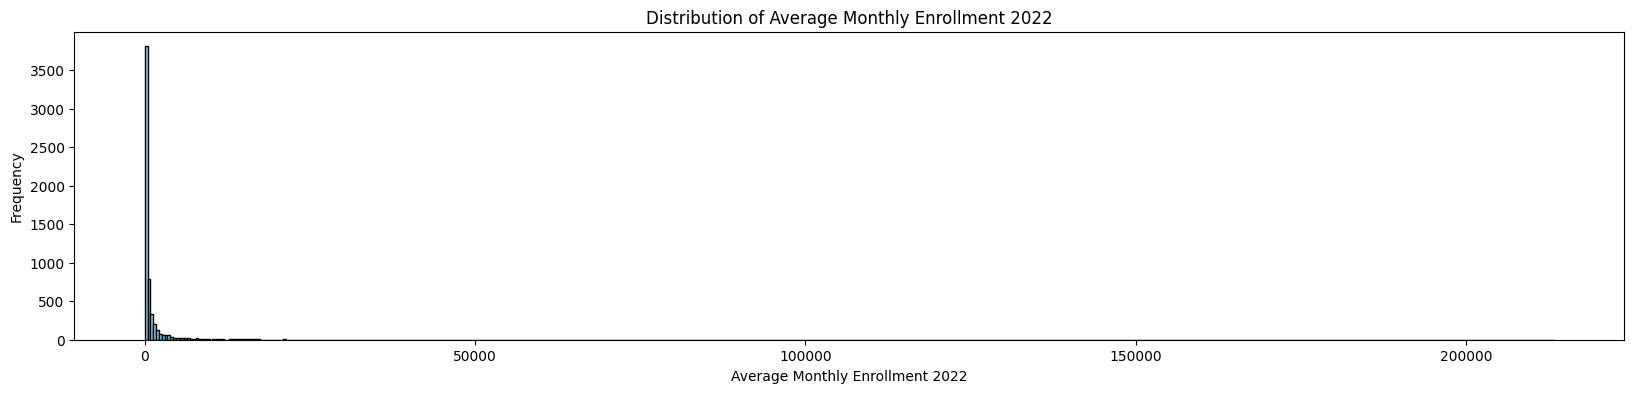

In [ ]:
# Plot histogram
plt.figure(figsize=(20, 4))
plt.hist(train['AverageMonthlyEnrollment2022'], bins=500, color='skyblue', edgecolor='black')
plt.xlabel('Average Monthly Enrollment 2022')
plt.ylabel('Frequency')
plt.title('Distribution of Average Monthly Enrollment 2022')
plt.show()


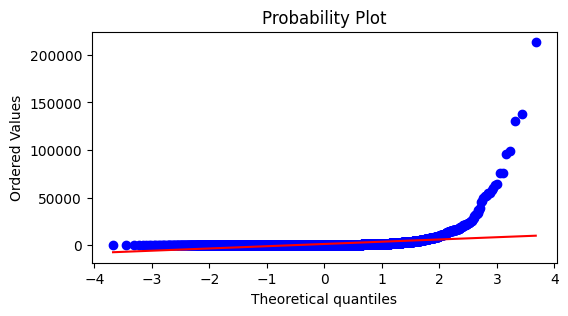

In [ ]:
#Use probability plot to check normality of data
plt.figure(figsize=(6,3))
res=stats.probplot(train['AverageMonthlyEnrollment2022'], plot=plt)

<Axes: >

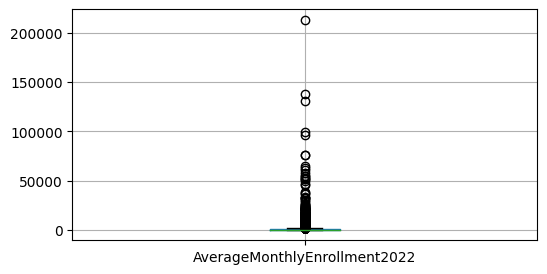

In [ ]:
#Boxplot is a good way to check distribution, spread, and outlier of numerical variables
plt.figure(figsize=(6,3))
train.boxplot(column =['AverageMonthlyEnrollment2022'])

✍️ **Observation**
- Dependent variable is extremely rigth skewed and clearly far away from a normal distribution. There are so many small 2022 enrollments and long tailed large enrollments.
- It's unlikely some data transformation can fix this to a normal or unskewed distribution.

#### **Relationship between Dependent and Independent Variables**

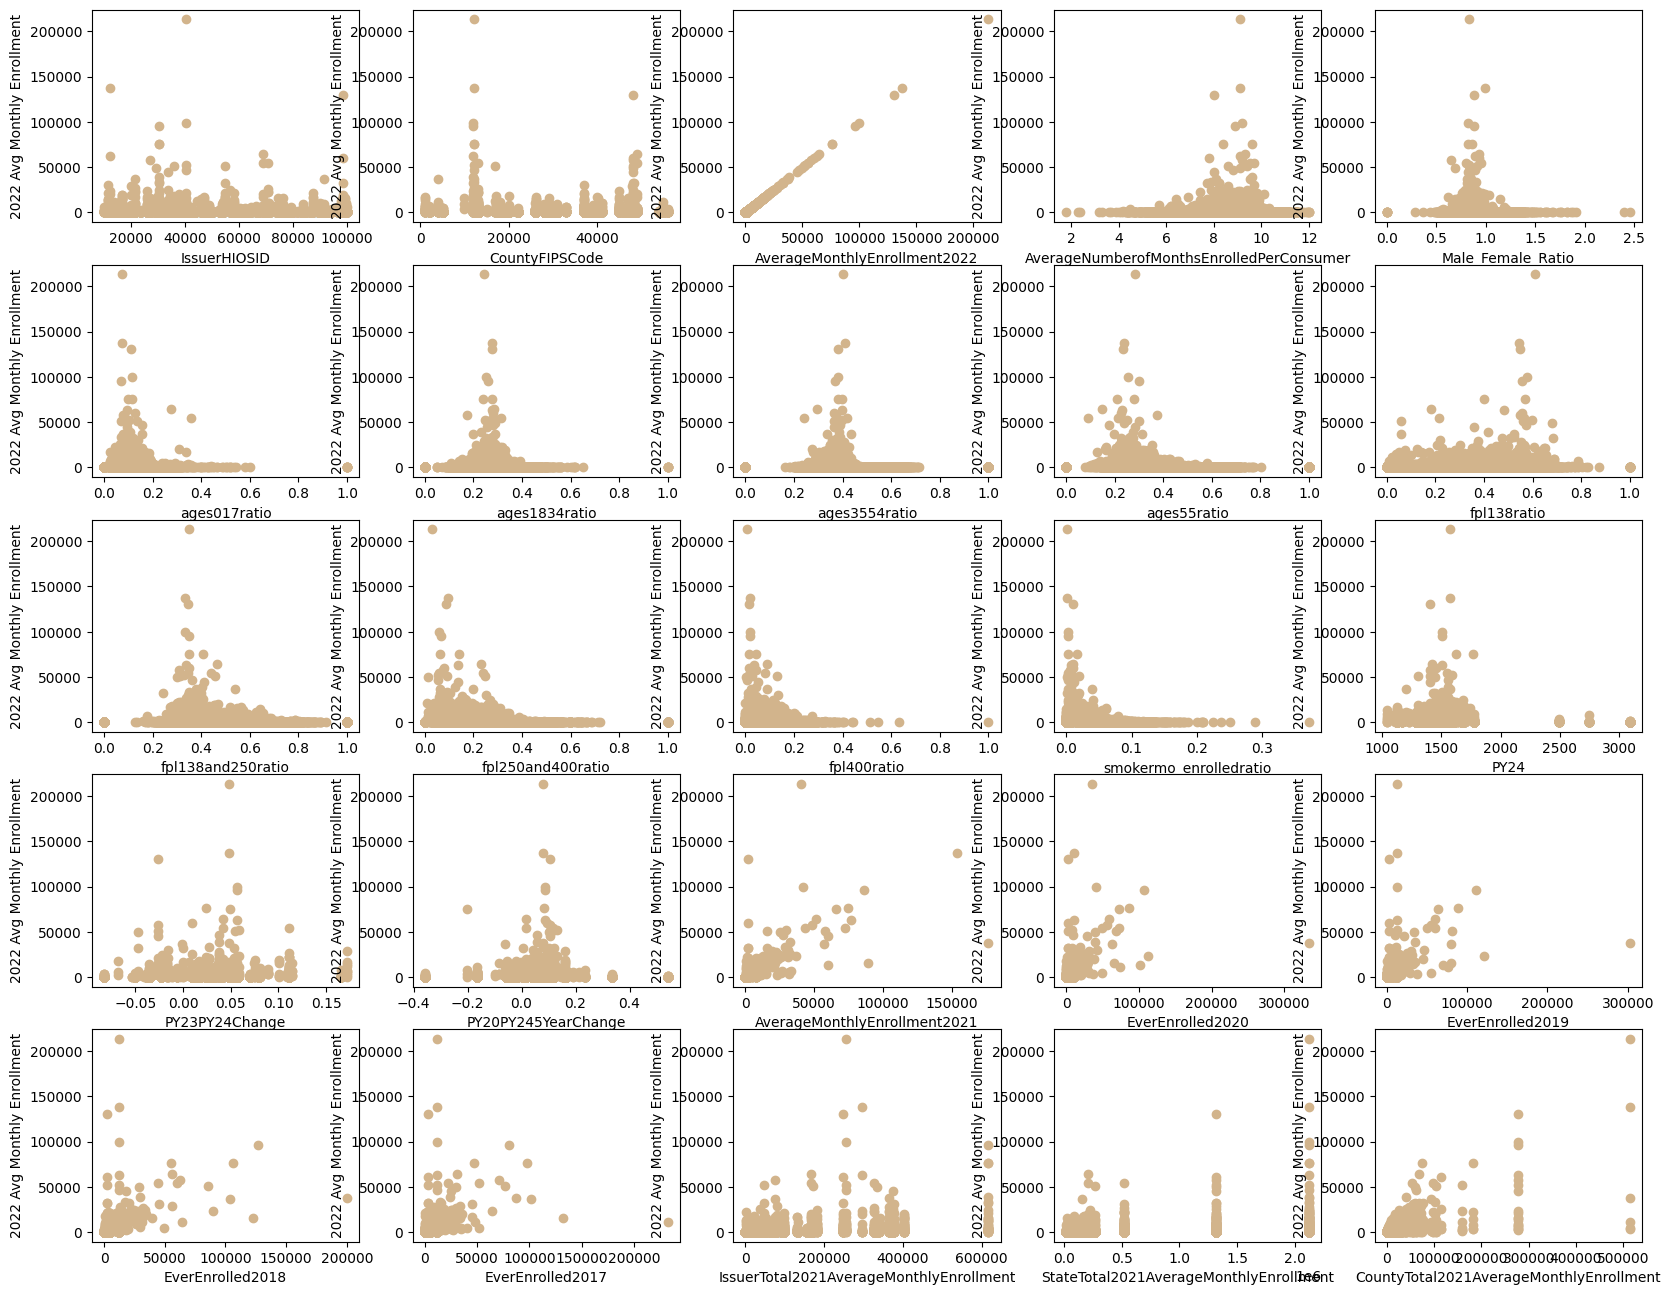

In [ ]:
# Histogram for all continuous features for training data
grh_per_row =5
cols_to_remove=['State']
cols = [col for col in df_model.columns if col not in cols_to_remove]

fig, ax = plt.subplots(len(cols) // grh_per_row, grh_per_row, figsize=(20, 16))

for count, feature in enumerate(cols, 0):
        row = count // grh_per_row
        col = (count) % grh_per_row

        ax[row, col].scatter(train[feature], train['AverageMonthlyEnrollment2022'], color="tan")
        ax[row, col].set_xlabel(feature)
        ax[row, col].set_ylabel("2022 Avg Monthly Enrollment")
        ax[row, col].tick_params(axis='x')

plt.show()

✍️ **Observations**
- Clearly, the relationships to dependent variable aren't linear for most features. And, it's quite non-linear that some simple data transformation won't fix it. So, linear regression models don't seem to be good choice.
- For enrollment of previous years, the relationship to the dependent variable do seem a bit linear but if we think about constant variance assumption in linear regression models, it's quite violated.


#### **Model Selection**
Before futher data cleaning and pre-processing, if we can, it's good to think about model selection because this will affect how we further process those steps.

- **Linear regression models and tree models**:
  - Non-linearity: As discussed, we'll probably not use linear regression models because for most features, the relationship to the dependent variables are clearly non-linear. Also, we aren't sure some features are good predictors. In this case, it seems some tree models could be good. They are very good at dealing with non-linear relationship because they are good at capturing non-linear relationships at multiple levels of granularity, recursive Partitioning, and approximation on small pieces seperately.
  - Deal with irrelevant features: Trees are also good at cut unrelavant features gracefully (by for example tuning hyper-parameters like tree depth those unimportant features would be cut).
  - The downside of tree models for this data is that since we have so many numberical features, it might be slow. (Unlike for categorical features, tree need to figure out the 'cuts' based on metric results for numerical features.)
- **SVM and deep learning models**: The other option might be SVM or even deep learning. But, SVM are suitible more for classification and need feature scaling. Also, SVM is distance based and can be quite sensitive to categorical feature labeling. We have features like State, County code, and issure IDS. Each are with large unique values, so it's tricky to label them appropriately to numberical values. Thus, SVM might not be good also. Deep learning is quite complex and can be too much for this dataset.
So, we'll try to focus on tree models only first. If tree models don't work, we'll start to try other options.
- **Feature Scaling**: Since we choose tree models, the good news is we don't need to do feature scaling since tree models aren't distance based. 😄


#### **Remove Outliers**
Tree models are usually robust to outliers. So, we'll just remove a few very extreme ones. From the scatter plot above,AverageMonthlyEnrollment2022 less than 20000 jump out of the crowd. Let's just remove it.  

In [ ]:
# Remove outliers
train= train[train['AverageMonthlyEnrollment2022']<200000]
train.shape

(5871, 26)

#### **Label Encoding**
- The only string type is "State". We don't want to use one-hot encoding because we have so many states. We'll use label encoding based on the average dependent variable values.

In [ ]:
#Label encoding refering to average monthly enrollment 2022 of each "label"
train_copy= train.copy()
labels_ordered=train_copy.groupby(['State'])['AverageMonthlyEnrollment2022'].mean().sort_values().index
labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
print(labels_ordered)
train['State']=train['State'].map(labels_ordered)

test_default = collections.defaultdict(lambda: 0.0, labels_ordered) #map categories not in training data but in testing to 0
test['State']=test['State'].map( test_default)

{'WV': 0, 'LA': 1, 'NE': 2, 'AR': 3, 'ND': 4, 'MT': 5, 'IA': 6, 'SD': 7, 'AK': 8, 'KS': 9, 'MS': 10, 'OH': 11, 'IN': 12, 'MO': 13, 'TN': 14, 'WY': 15, 'OR': 16, 'WI': 17, 'MI': 18, 'GA': 19, 'OK': 20, 'NC': 21, 'IL': 22, 'NH': 23, 'HI': 24, 'SC': 25, 'UT': 26, 'AL': 27, 'TX': 28, 'AZ': 29, 'FL': 30, 'DE': 31}


<ipython-input-77-55e9d91a76e1>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### **Heat Map**
Since we have non-linear relationships, we'll ues spearman

In [ ]:
df_model.head()

,State,IssuerHIOSID,CountyFIPSCode,AverageMonthlyEnrollment2022,AverageNumberofMonthsEnrolledPerConsumer,Male_Female_Ratio,ages017ratio,ages1834ratio,ages3554ratio,ages55ratio,fpl138ratio,fpl138and250ratio,fpl250and400ratio,fpl400ratio,smokermo_enrolledratio,PY24,PY23PY24Change,PY20PY245YearChange,AverageMonthlyEnrollment2021,EverEnrolled2020,EverEnrolled2019,EverEnrolled2018,EverEnrolled2017,IssuerTotal2021AverageMonthlyEnrollment,StateTotal2021AverageMonthlyEnrollment,CountyTotal2021AverageMonthlyEnrollment
0,AK,38344,2013.0,17.0,6.3,1.015454,0.096851,0.202953,0.386781,0.313415,0.015015,0.458150,0.377133,0.123087,0.000000,2744.21,0.16568,0.236844,14.0,17.0,16.000000,28.000000,28.000000,16048.0,17449.0,14.0
1,AK,38344,2016.0,28.0,10.2,0.866667,0.096851,0.202953,0.386781,0.313415,0.015015,0.458150,0.377133,0.123087,0.000000,2744.21,0.16568,0.236844,27.0,40.0,37.000000,32.000000,37.000000,16048.0,17449.0,27.0
2,AK,38344,2020.0,7690.0,9.8,0.855695,0.160078,0.239792,0.340832,0.259298,0.047204,0.371782,0.320286,0.173602,0.037321,2744.21,0.16568,0.236844,6796.0,6924.0,7731.000000,7806.000000,7601.000000,16048.0,17449.0,7325.0
3,AK,77963,2020.0,1092.0,8.8,1.007353,0.098811,0.324794,0.374199,0.202196,0.028388,0.387363,0.321429,0.216117,0.000000,2744.21,0.16568,0.236844,529.0,1071.0,654.892857,673.285714,651.071429,1401.0,17449.0,7325.0
4,AK,38344,2050.0,40.0,9.1,1.105263,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2744.21,0.16568,0.236844,43.0,45.0,40.000000,47.000000,43.000000,16048.0,17449.0,43.0


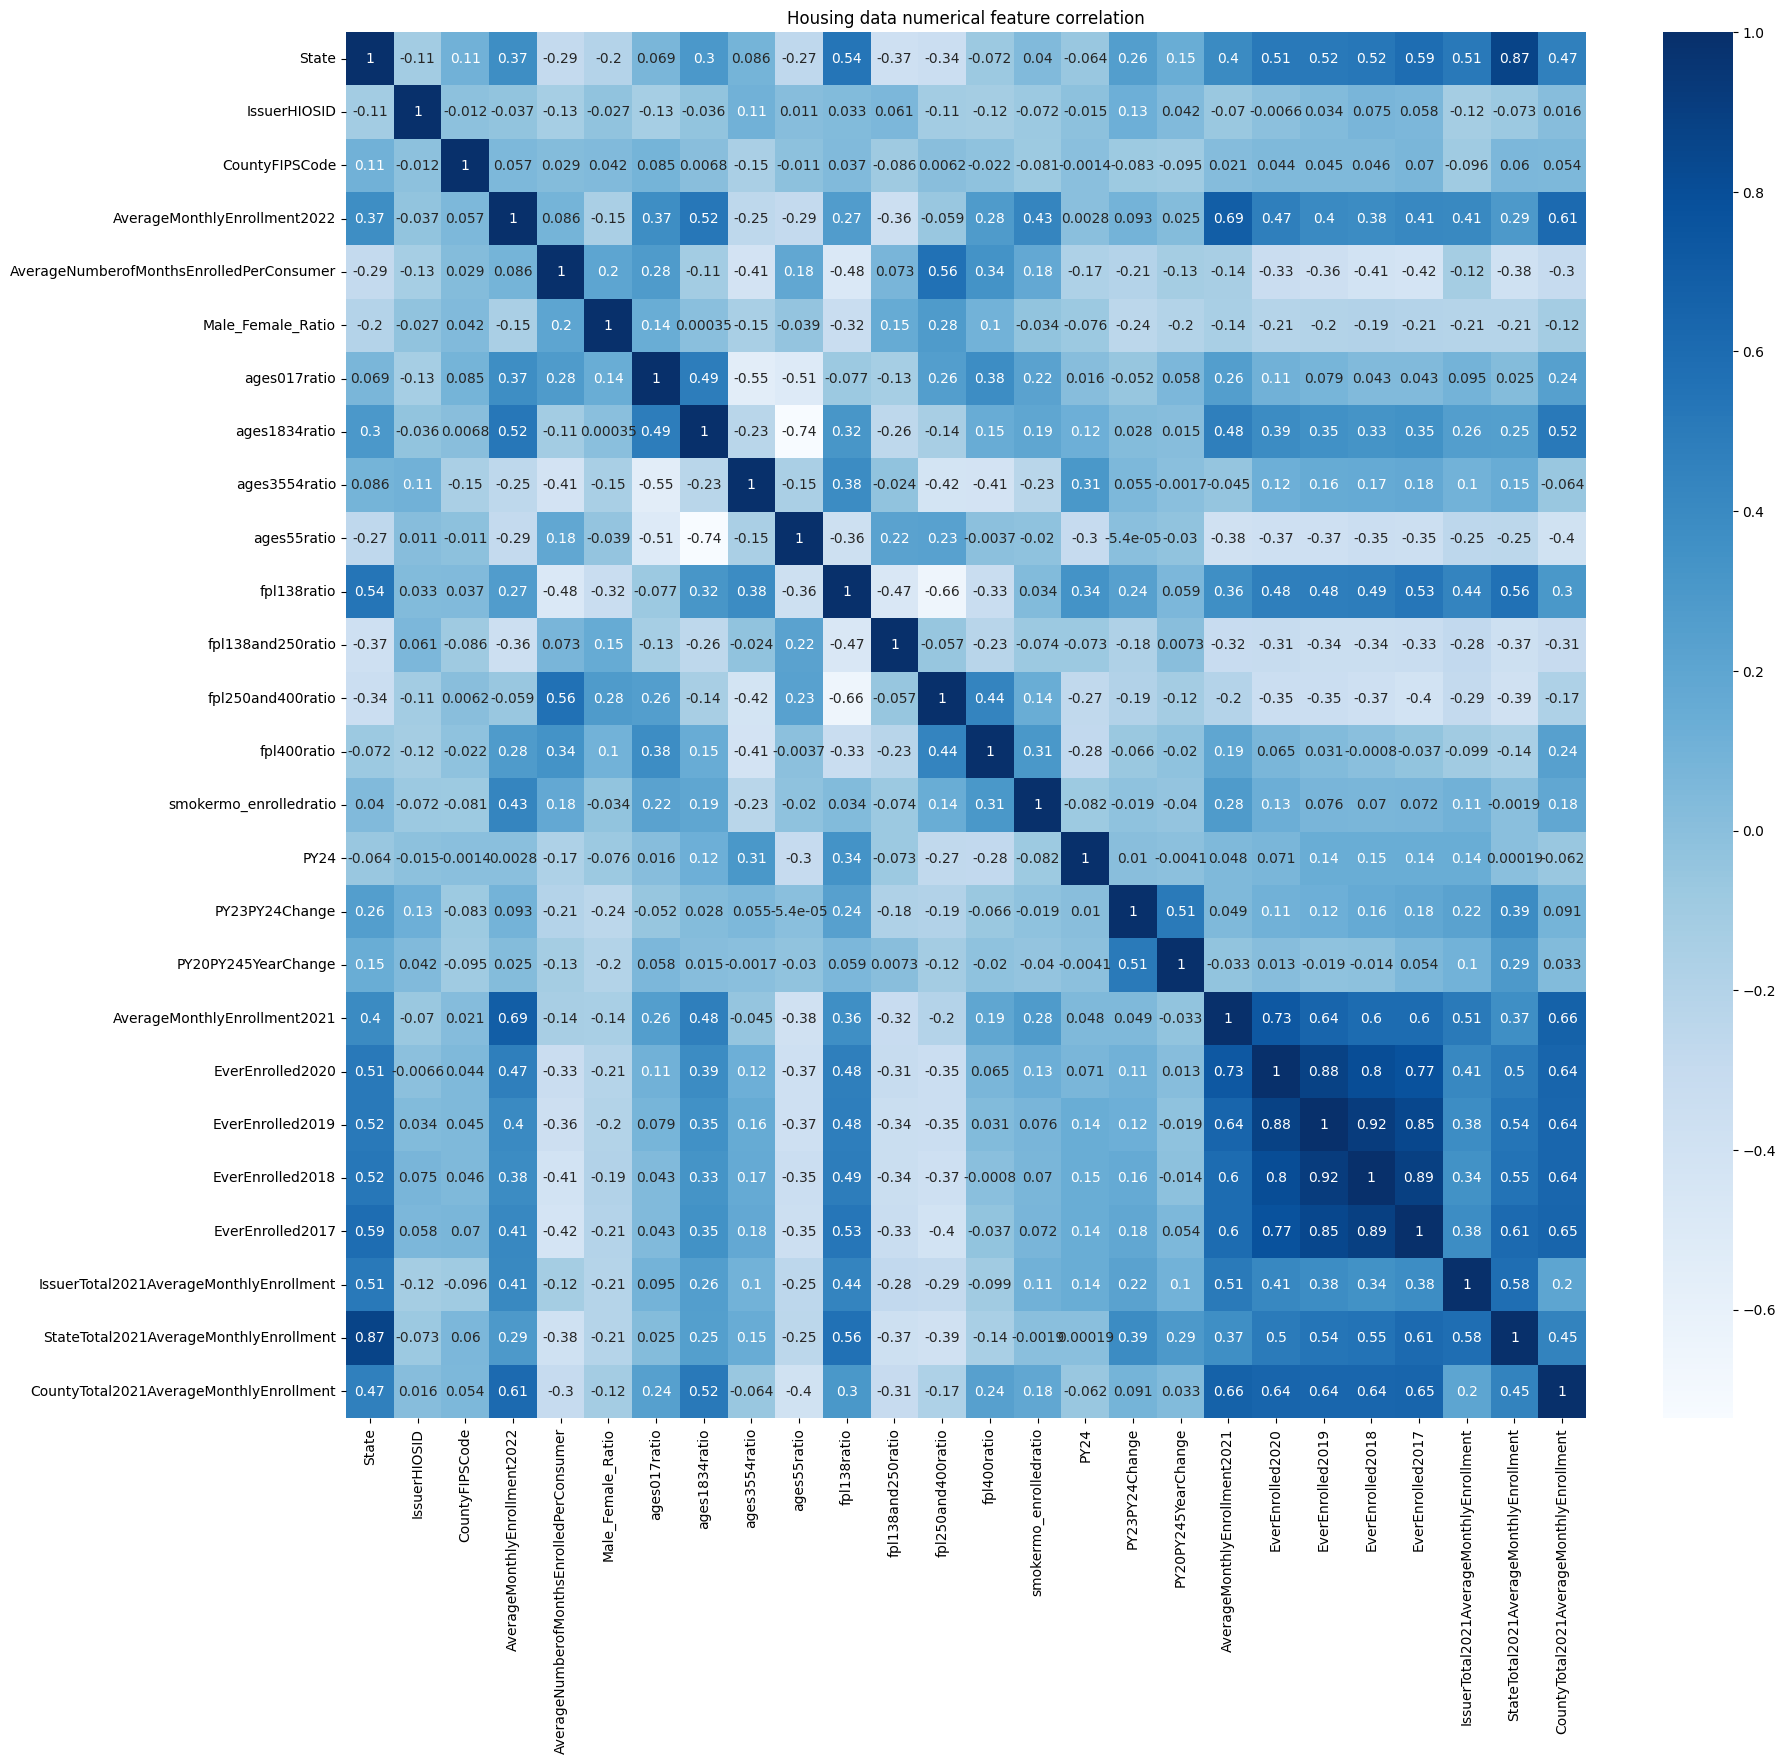

In [ ]:
# Use heatmap to check feature correlations
# cols_to_remove = ['State', 'Issuer HIOS ID', 'County FIPS Code']
cols_to_remove=[]
cols = [col for col in df_model.columns if col not in cols_to_remove]
corr = train[cols].corr(method='spearman') # spearman since lots of relationships are non-linear

plt.figure(figsize=(20, 18))
plt.title("Housing data numerical feature correlation")
sns.heatmap(data=corr, annot=True, cmap="Blues")
plt.show()

✍️ **Observations**

- **Correlations to depedent variable**(2022 average monthly enrollment):
  - **Enrollment of other years**: As expected, all prior year enrollment of each state, county, and issuer ID combination has some correlations with 2022 years enrollment. And, in general, the closer the years, the stronger the effect:
    - 2021 year enrollment has the highest correlations (around 0.64)
    - 2020 year is the second (around 0.44)
    - the 2017 - 2019 years has the least (around 0.35-0.38)
  - **State, county, issuer - Names**:
    - **State** has a good correlation with 2022 enrollment (0.28) while county of issuer has very little correlations. This makes sense since there are only 30 somthing states and there are many records under each state for each year. So, the model would learn something about state. In contrast, there are so many county and issuers, so there are not enough records under each county or each issuer for the model to learn about them.
  - **State, County, and Issuer - Total 2021 enrollments**: Those features seems to be much better than just a state, county, and issuer name (especially true for county and issuer). Exciting to see those created columns have obvious correlations with dependent variable
    - **Total 2021 county enrollment** has the most effect (around 0.59!). Clearly, this is a essential predictor!
    - **Total 2021 issuer enrollment** also has good correlation (arround 0.38).
    - **Total 2021 State enrollment** do has some correlation (around 0.22)
  - **Premiums and premium increases**: Intestingly, those aren't correlated to 2022 enrollment obviously. Note we have above 6000 2022 records (state, county, and issuer combination) but only around 60 premiums records. So, a lot of records don't have premium. This could explain why the premium didn't affect the enrollment in our data. But keep in mind this doensn't say premium and enrollment aren't related in general (because really most records are missing premiums in our data).
  - **Demographic Features**:
    - **Age ratios**: Age ratios in all ranges affect the enrollment, with  **age 17 (0.32)m age 18-34 (0.49!), age 35-54 (-0.25), and age 55+(-0.24)**. This is intesting. I am not expect of this but I  guess the main consumers for the affordable plans are young people from 18-34 and kids. Age 35+ group ratio has negative correlation to enrollments.
    - **Smoker ratios**: smoker ratio has a big correlation of **0.41**. This means the more smokers in a county and under a issuer, the more the enrollment is. This is interesting to see.
    - **Percent FPL ratios**:
    - FPL < 138 has good positive correlation of 0.22 to the enrollment. This is expected because the plan is supposed to service for lower income people.
    - FPL 138 to 250 has good negative correlation of -0.3 to enrollment.
    - FPL 400+ also has a good positive correlation of 0.25. This is a bit unexpected and may need deeper dive in order to understand. Are county and issuers with richer consumers also have poor consumers.
- Correlations between other features: There are several high correlation features that are interesting
  - **state** and **precent of FPL ratios**: There are positive or negative correlations from absolute values of 0.35 to 0.6. So, some states are obvious richer or poorler than other states.
  - **Average months a consumer enrolled** and **FPL ratio**: The correlation between average months a consumer enrolled and FPL ratio of 250 to 400 and 400+ is around 0.56 and 0.34! To FPL less than 138, it is -0.38, negatively correlated. It seems **places and plans with richer consumers tend to stay in the plans longer**.
  - **Average months a enrollment** and **enrollments**: The correlation between  average months a consumer enrolled and enrollments features are all negative around 0.3! This means c**onsumers in the county and plans with more consumers tends to stay shorter**. I guess those consumers probably have more choices.
  - **Average months a enrollment** and **Age 35-54 ratio**: The correlation between average months a consumer enrolled and age 35-54 us strong negative too (around -0.42). This could be those group might have other choices? I maybe good to investigate further.
  - **Ages**: Age less than 17 is highly correlated with age 18-34 ratio (around 0.5) while it is highly negatively correlated with age 34-54 and 54+ ratios (around -0.5). This could make sense because issuers might target different age groups (either younger or older). Also, county with 18-34 might have more kids?
  



    


# **Part 4: Modeling and Evaluations**

#### **Seperate Depend and Independent variables**

In [ ]:
# Get X, y from train and test
X_train =train.drop(columns=['AverageMonthlyEnrollment2022'])
y_train= train['AverageMonthlyEnrollment2022']
X_test =test.drop(columns=['AverageMonthlyEnrollment2022'])
y_test= test['AverageMonthlyEnrollment2022']


#### **Tree structure**
This is different for each tree models and for each trees in tree models. But it's insightly just to take a look. We'll just see a few depth (since it will be too small if we want to see too many levels)

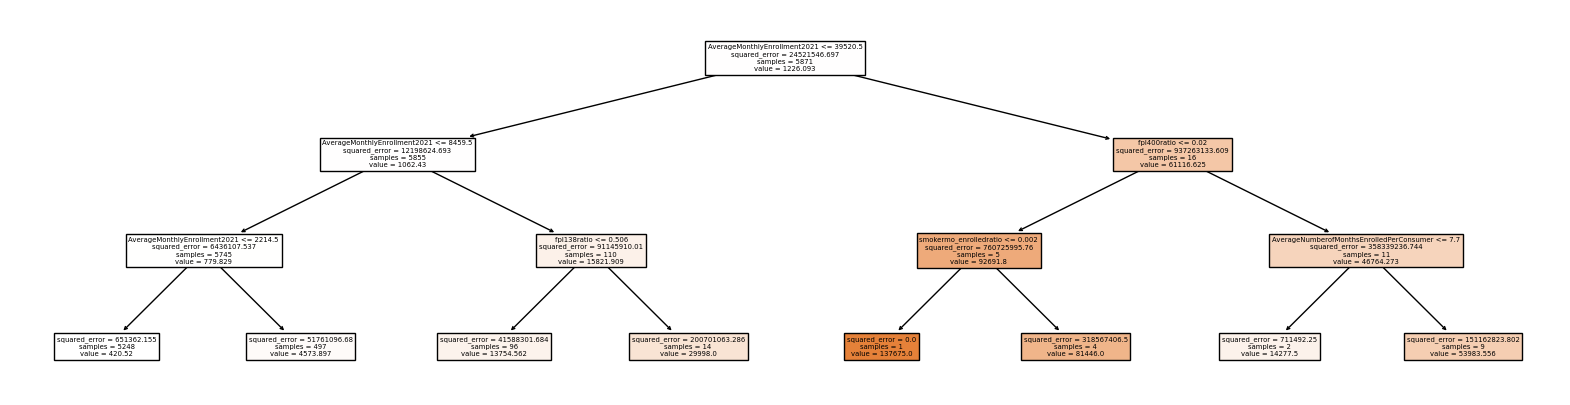

In [ ]:
dt_regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = dt_regr.fit(X_train, y_train)

fig = plt.figure(figsize=(20,5))
_ = tree.plot_tree(dt_regr, feature_names=X_train.columns, filled=True)

## **Part 4.1: Random Forest**

#### **Build Utility Functions**

#### **Cross Validation to find best hyper-parameters - Random Forest**

In [ ]:
#Use Random Search to tune Random Forest
# Random Search
n_estimators_list=[30,40]
max_depth=[40,60]
max_features=[7,8]

params_grid={
        "n_estimators":  n_estimators_list,
        "max_depth": max_depth,
        "max_features":max_features,  }
randomFR_class=RandomizedSearchCV(estimator =RandomForestRegressor(
                                       verbose=0,
                                       random_state=100),
                              param_distributions=params_grid,
                              n_iter=40,
                              scoring='neg_mean_squared_error',
                              cv=4,
                              refit=True,
                              return_train_score=True,
                                   n_jobs=-1)
# fit the model
randomFR_class.fit(X_train,y_train)

# Access and print the results of each run
cv_results = randomFR_class.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("Mean MSE:", -mean_score)
    print("Parameters:", params)
    print("="*30)

# Print the best parameters and corresponding results
print("Best Parameters:", randomFR_class.best_params_)
print("Best MSE:", -randomFR_class.best_score_)



Mean MSE: 6703620.773426123
Parameters: {'n_estimators': 30, 'max_features': 7, 'max_depth': 40}
Mean MSE: 6613517.763689664
Parameters: {'n_estimators': 40, 'max_features': 7, 'max_depth': 40}
Mean MSE: 6633527.372021208
Parameters: {'n_estimators': 30, 'max_features': 8, 'max_depth': 40}
Mean MSE: 6809348.709775837
Parameters: {'n_estimators': 40, 'max_features': 8, 'max_depth': 40}
Mean MSE: 6703620.773426123
Parameters: {'n_estimators': 30, 'max_features': 7, 'max_depth': 60}
Mean MSE: 6613517.763689664
Parameters: {'n_estimators': 40, 'max_features': 7, 'max_depth': 60}
Mean MSE: 6633527.372021208
Parameters: {'n_estimators': 30, 'max_features': 8, 'max_depth': 60}
Mean MSE: 6809348.709775837
Parameters: {'n_estimators': 40, 'max_features': 8, 'max_depth': 60}
Best Parameters: {'n_estimators': 40, 'max_features': 7, 'max_depth': 40}
Best MSE: 6613517.763689664


#### **Plot results - Random Forest**

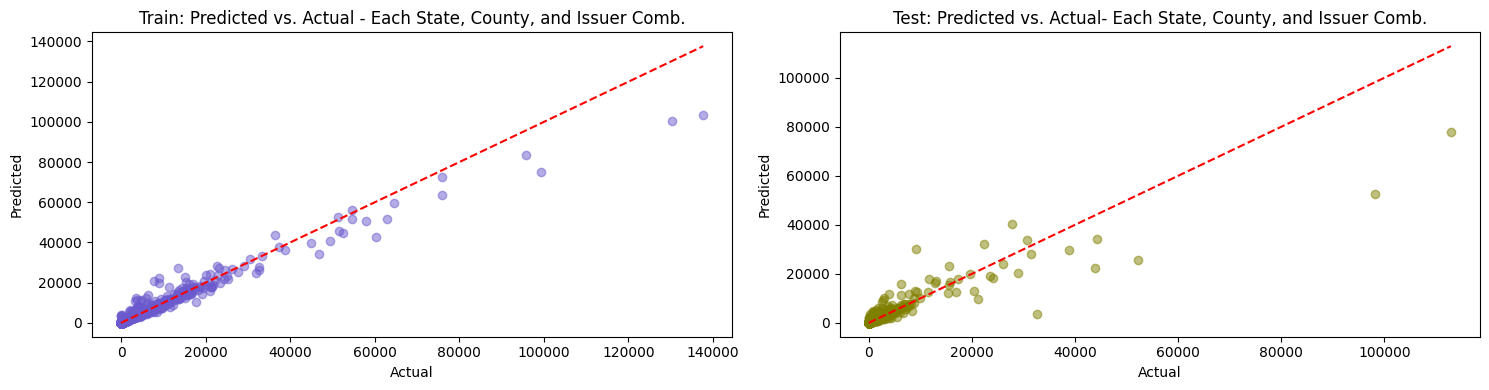

Worst predictions%:
       State  Actual  Predicted  Percentage_Error
7086    UT    15.0   1889.150        124.943333
599     FL    22.0   1956.275         87.921591
729     FL    29.0    823.425         27.393966
709     FL   194.0   3689.075         18.015851
449     AZ   137.0   2018.025         13.730109
7583    WI   181.0   2211.225         11.216713
7631    WI    29.0    351.225         11.111207
6939    TX   171.0   2004.175         10.720322
4126    NC    23.0    254.050         10.045652
3918    NC    66.0    631.250          8.564394


In [ ]:
def plot_predicted_vs_actual(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, labels_ordered=labels_ordered):
    # Make predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Create DataFrame for training and testing results
    results_train_df = pd.DataFrame({'State': X_train['State'], 'Actual': y_train, 'Predicted': y_train_pred})
    results_test_df = pd.DataFrame({'State': X_test['State'], 'Actual': y_test, 'Predicted': y_test_pred})

    # Convert state codes to actual state names
    labels_ordered_rev = {v: k for k, v in labels_ordered.items()}
    results_train_df['State'] = results_train_df['State'].map(labels_ordered_rev)
    results_test_df['State'] = results_test_df['State'].map(labels_ordered_rev)

    # Plot predicted vs. actual values for training data
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(results_train_df['Actual'], results_train_df['Predicted'], color='slateblue', alpha=0.5)
    plt.plot([results_train_df['Actual'].min(), results_train_df['Actual'].max()],
             [results_train_df['Actual'].min(), results_train_df['Actual'].max()],
             color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Train: Predicted vs. Actual - Each State, County, and Issuer Comb.')

    # Plot predicted vs. actual values for test data
    plt.subplot(1, 2, 2)
    plt.scatter(results_test_df['Actual'], results_test_df['Predicted'], color='olive', alpha=0.5)
    plt.plot([results_test_df['Actual'].min(), results_test_df['Actual'].max()],
             [results_test_df['Actual'].min(), results_test_df['Actual'].max()],
             color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Test: Predicted vs. Actual- Each State, County, and Issuer Comb.')

    plt.tight_layout()
    plt.show()

    # Worst predictions
    results_test_df['Percentage_Error'] = abs((results_test_df['Predicted'] - results_test_df['Actual']) / results_test_df['Actual'])
    worst_predictions = results_test_df[results_test_df['Actual']!=0].sort_values(by='Percentage_Error', ascending=False)
    print("Worst predictions%:\n ",worst_predictions.head(10) )

    return results_train_df, results_test_df

results_train_df, results_test_df = plot_predicted_vs_actual(randomFR_class)


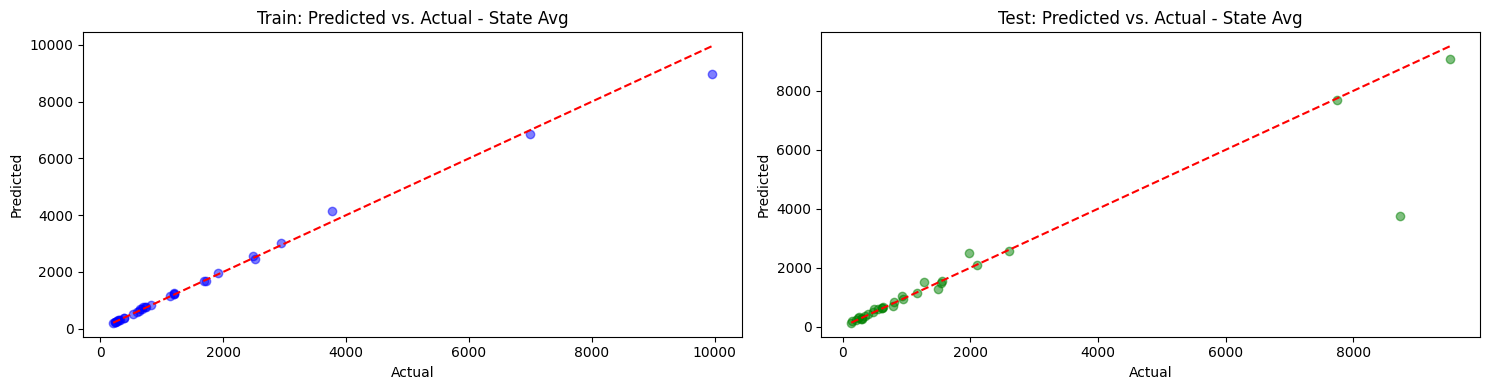

Predictions from worst to best- State Average%:
     State       Actual    Predicted  Percentage_Error
29    AZ  8733.285714  3757.739286          0.569722
2     NE   248.904762   333.136508          0.338410
9     KS   152.152542   200.780508          0.319600
28    TX  1983.327731  2496.022479          0.258502
7     SD   242.153846   296.169231          0.223062
26    UT  1274.590909  1523.411364          0.195216
11    OH   498.585366   591.488110          0.186333
22    IL  1496.687500  1287.935938          0.139476
20    OK   925.156250  1054.071875          0.139345
15    WY   792.357143   684.966071          0.135534
5     MT   305.750000   270.274432          0.116028
18    MI   555.562500   616.153906          0.109063
10    MS   394.955556   431.933333          0.093625
19    GA   639.721739   677.207826          0.058597
14    TN   474.906977   498.459593          0.049594
21    NC  1540.988889  1468.943611          0.046753
3     AR   289.442623   275.997951          0.046

In [ ]:
def plot_predicted_vs_actual_by_state(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, labels_ordered=labels_ordered):
    # Make predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Create DataFrame for training and test results
    results_train_df = pd.DataFrame({'State': X_train['State'], 'Actual': y_train, 'Predicted': y_train_pred})
    results_test_df = pd.DataFrame({'State': X_test['State'], 'Actual': y_test, 'Predicted': y_test_pred})

    # Average actual and predicted values by state for training and test data
    results_train_avg = results_train_df.groupby('State').mean().reset_index()
    results_test_avg = results_test_df.groupby('State').mean().reset_index()

    # Convert state codes to actual state names
    labels_ordered_rev = {v: k for k, v in labels_ordered.items()}
    results_train_avg['State'] = results_train_avg['State'].map(labels_ordered_rev)
    results_test_avg['State'] = results_test_avg['State'].map(labels_ordered_rev)

    # Plot for training data
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(results_train_avg['Actual'], results_train_avg['Predicted'], color='blue', alpha=0.5)
    plt.plot([results_train_avg['Actual'].min(), results_train_avg['Actual'].max()],
             [results_train_avg['Actual'].min(), results_train_avg['Actual'].max()],
             color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Train: Predicted vs. Actual - State Avg')

    # Plot for test data
    plt.subplot(1, 2, 2)
    plt.scatter(results_test_avg['Actual'], results_test_avg['Predicted'], color='green', alpha=0.5)
    plt.plot([results_test_avg['Actual'].min(), results_test_avg['Actual'].max()],
             [results_test_avg['Actual'].min(), results_test_avg['Actual'].max()],
             color='red', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Test: Predicted vs. Actual - State Avg')

    plt.tight_layout()
    plt.show()

    # Worst predictions
    results_test_avg['Percentage_Error'] = abs((results_test_avg['Predicted'] - results_test_avg['Actual']) / results_test_avg['Actual'])
    worst_predictions = results_test_avg[results_test_avg['Actual']!=0].sort_values(by='Percentage_Error', ascending=False)
    print("Predictions from worst to best- State Average%:\n ",worst_predictions.head(40) )

    return results_train_avg, results_test_avg

results_train_avg, results_test_avg = plot_predicted_vs_actual_by_state(randomFR_class)

#### **Investigating Big Discrepancy Predictions**
It's obvious one prection is really bad. What state is that? Let's take a look!

In [ ]:
# actaul vs. predicted for the big discrepancy prediction item
results_test_avg[(results_test_avg['Actual']>8000) & (results_test_avg['Predicted']<4000)]

,State,Actual,Predicted,Percentage_Error
29,AZ,8733.285714,3757.739286,0.569722


So, this is for state AZ. Let's look at all records of prediction vs. actual from this state.

In [ ]:
results_test_df[results_test_df['State']=='AZ'].head(10)


,State,Actual,Predicted,Percentage_Error
428,AZ,21244.0,9897.700,0.534094
426,AZ,32621.0,3510.100,0.892398
434,AZ,1369.0,3665.050,1.677173
446,AZ,1031.0,2059.700,0.997769
449,AZ,137.0,2018.025,13.730109
445,AZ,2857.0,2894.800,0.013231
435,AZ,1874.0,2258.800,0.205336


It seems for AZ, the big discrepancy came from one record. Let's take a closer look at that particular record.

In [ ]:
df_model[(df_model['State']=='AZ') &(df_model['AverageMonthlyEnrollment2022']==32621.0)].head(10)

,State,IssuerHIOSID,CountyFIPSCode,AverageMonthlyEnrollment2022,AverageNumberofMonthsEnrolledPerConsumer,Male_Female_Ratio,ages017ratio,ages1834ratio,ages3554ratio,ages55ratio,fpl138ratio,fpl138and250ratio,fpl250and400ratio,fpl400ratio,smokermo_enrolledratio,PY24,PY23PY24Change,PY20PY245YearChange,AverageMonthlyEnrollment2021,EverEnrolled2020,EverEnrolled2019,EverEnrolled2018,EverEnrolled2017,IssuerTotal2021AverageMonthlyEnrollment,StateTotal2021AverageMonthlyEnrollment,CountyTotal2021AverageMonthlyEnrollment
426,AZ,40702,4013.0,32621.0,8.0,0.874232,0.151993,0.223942,0.314102,0.309963,0.052206,0.595966,0.203519,0.099292,0.01168,1203.26,-0.000581,-0.059615,1137.0,6403.807692,8551.8,11515.666667,10907.5625,1137.0,151182.0,94157.0


✍️ So, for state 'AZ' with Issuer HIOS ID of 40702 and County FIP code of 4013. The average enrollment of 2021 is only 1137 while it has average enrollment of 32621 in 2022. This is unusual and probably worth business to dig in to see the reason, but for prediction purpose, this explains why the prediction of AZ is much lower than actual.

In [ ]:
results_test_df.head()

,State,Actual,Predicted,Percentage_Error
61,AL,1705.0,1652.300,0.030909
5504,OR,1146.0,1223.300,0.067452
5884,TN,1196.0,1512.725,0.264820
5635,SC,309.0,351.050,0.136084
1636,IL,3756.0,4960.125,0.320587


In [ ]:
def display_results(results_avg, exclude_states=[]):
    # Display top 5 worst prediction results ordered by absolute difference in a table
    results_avg['Abs_Difference'] = np.abs(results_avg['Predicted'] - results_avg['Actual'])
    results_avg['Abs_Difference perc'] = np.abs((results_avg['Predicted'] - results_avg['Actual']) / results_avg['Actual']  )
    results_avg_sorted = results_avg[results_avg['Actual']!=0].sort_values(by='Abs_Difference perc', ascending=False)

    # mean absolute error exclude some specific states
    results_avg_sorted = results_avg_sorted[~results_avg_sorted['State'].isin(exclude_states) ]
    abs_mean_error = np.mean(results_avg_sorted['Abs_Difference'])
    print('Absolute mean error: ', abs_mean_error)
    return abs_mean_error

abs_mean_error={}
abs_mean_error['random forest'] = display_results(results_test_avg , exclude_states=['AZ'])

Absolute mean error:  82.368647532033


✍️ **Model Performance**

- In general, the prediction is good except for state 'AZ'. And for state 'AZ', it's from one particular records, which the enrollment jump from 2021 to 2022. The error could caused by some speical events or a error when record the data. So, we can ignore this when we think about model performance.

## **Part 4.2: Gradient Boost**

In [ ]:
#Use Random Search to tune Gradient Boost
num_leaves=[2,4,6,8] #the maximum number of terminal nodes (leaves) in each tree of the gradient boosting ensemble.
learn_rate_list=[0.2, 0.1, 0.05, 0.01]
n_estimators_list=[100, 200, 300, 400] #number of trees
max_bin=[250,300,350,400,450] #maximum number of bins used for discretizing continuous features.
bagging_fraction=[0.7,0.8,0.9] #for regularization. controls the fraction of data that will be randomly sampled (with replacement) for each boosting iteration.
bagging_freq=[5,6] #controls how frequently bagging is applied during training.  if bagging_freq is set to 5, bagging will be applied every 5 boosting iterations. Setting bagging_freq to 0 means bagging will be disabled.
# bagging_seed=[7,8] #specifies the random seed used for bagging
bagging_seed=[7]
feature_fraction=[0.5, 0.6,0.7] #controls the fraction of features to be randomly sampled (without replacement) for each tree or boosting iteration.
# feature_seed=[6,7] #controls the random seed used for feature fraction.
feature_seed=[6]

params_grid={"num_leaves":num_leaves,
        "learning_rate":learn_rate_list,
        "n_estimators":  n_estimators_list,
        "max_bin": max_bin,
        "bagging_fraction":bagging_fraction,
        "bagging_freq":bagging_freq,
        "bagging_seed":bagging_seed,
        "feature_fraction":feature_fraction,
        "feature_fraction_seed":feature_seed  }
random_GBM_class=RandomizedSearchCV(estimator = LGBMRegressor(objective='regression',
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       random_state=100),
                              param_distributions=params_grid,
                              n_iter=40,
                              scoring='neg_mean_squared_error',
                              cv=2,
                              refit=True,
                              return_train_score=True,
                                   n_jobs=-1)
random_GBM_class.fit(X_train,y_train)

# Access and print the results of each run
cv_results = random_GBM_class.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("Mean MSE:", -mean_score)
    print("Parameters:", params)
    print("="*30)

# Print the best parameters and corresponding results
print("Best Parameters:", random_GBM_class.best_params_)
print("Best MSE:", -random_GBM_class.best_score_)

Mean MSE: 8521391.40275624
Parameters: {'num_leaves': 4, 'n_estimators': 300, 'max_bin': 350, 'learning_rate': 0.1, 'feature_fraction_seed': 6, 'feature_fraction': 0.7, 'bagging_seed': 7, 'bagging_freq': 5, 'bagging_fraction': 0.7}
Mean MSE: 8144951.618359972
Parameters: {'num_leaves': 6, 'n_estimators': 300, 'max_bin': 300, 'learning_rate': 0.1, 'feature_fraction_seed': 6, 'feature_fraction': 0.6, 'bagging_seed': 7, 'bagging_freq': 5, 'bagging_fraction': 0.8}
Mean MSE: 11260397.32906504
Parameters: {'num_leaves': 2, 'n_estimators': 300, 'max_bin': 350, 'learning_rate': 0.1, 'feature_fraction_seed': 6, 'feature_fraction': 0.5, 'bagging_seed': 7, 'bagging_freq': 6, 'bagging_fraction': 0.7}
Mean MSE: 8798225.2559898
Parameters: {'num_leaves': 6, 'n_estimators': 300, 'max_bin': 250, 'learning_rate': 0.2, 'feature_fraction_seed': 6, 'feature_fraction': 0.5, 'bagging_seed': 7, 'bagging_freq': 6, 'bagging_fraction': 0.7}
Mean MSE: 10881679.345171615
Parameters: {'num_leaves': 2, 'n_estimator

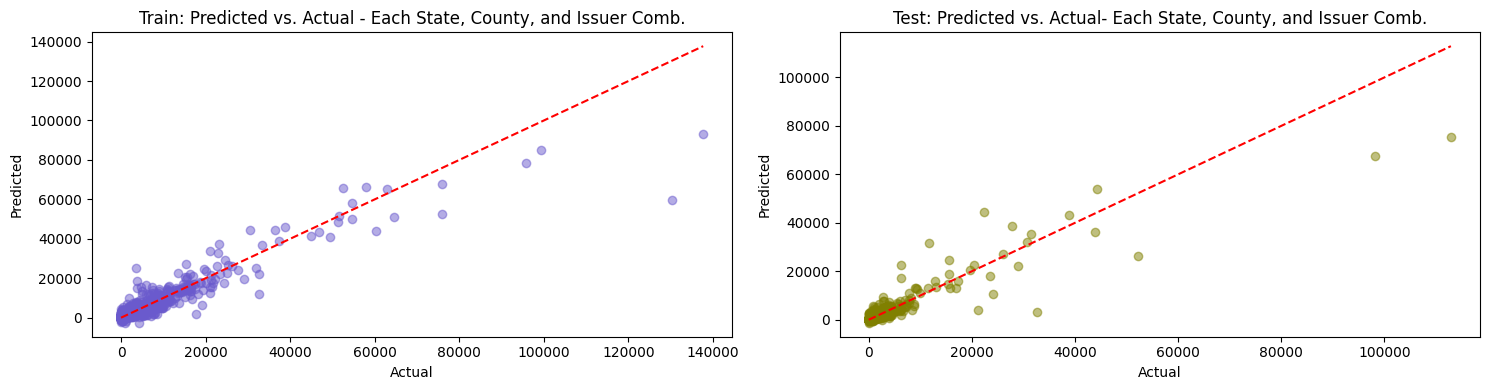

Worst predictions%:
       State  Actual    Predicted  Percentage_Error
729     FL    29.0  2926.213687         99.903920
4970    OH    38.0  2293.633182         59.358768
599     FL    22.0  -820.224190         38.282918
3383    MS    51.0  1509.614608         28.600286
5139    OH    86.0  2323.288774         26.014986
597     FL    54.0 -1290.970918         24.906869
449     AZ   137.0  2777.801481         19.275923
5133    OH    27.0   512.109026         17.967001
5119    OH    27.0   498.359573         17.457762
634     FL   119.0  2144.866385         17.024087


In [ ]:
results_train_df, results_test_df = plot_predicted_vs_actual(random_GBM_class)

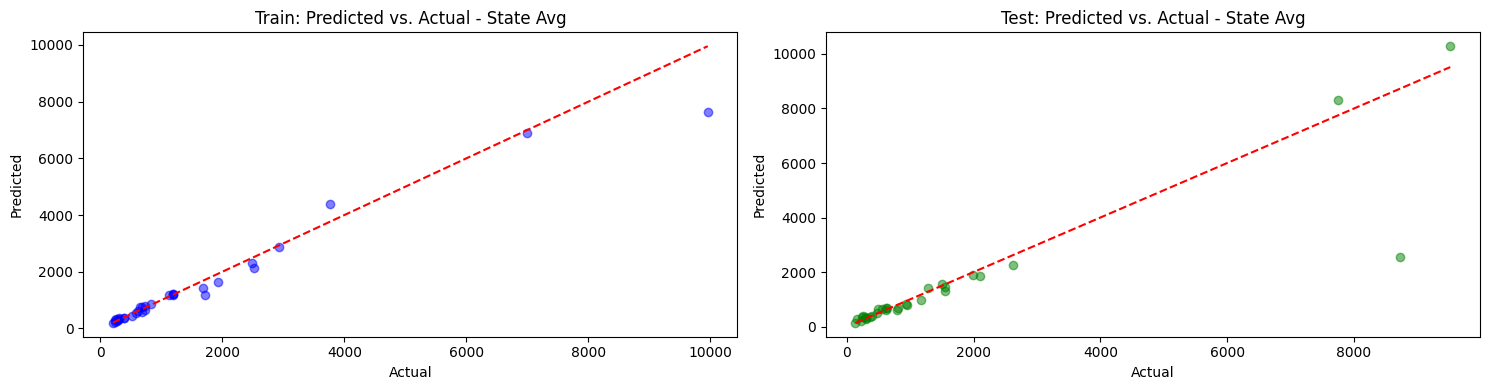

Predictions from worst to best- State Average%:
     State       Actual     Predicted  Percentage_Error
9     KS   152.152542    280.579421          0.844067
29    AZ  8733.285714   2562.650693          0.706565
2     NE   248.904762    399.133346          0.603558
7     SD   242.153846    333.375142          0.376708
11    OH   498.585366    632.377389          0.268343
15    WY   792.357143    608.176461          0.232447
18    MI   555.562500    658.419085          0.185140
8     AK  1164.333333    961.513880          0.174194
23    NH  1552.333333   1287.822462          0.170396
1     LA   945.274510    788.017457          0.166361
17    WI   805.095238    675.069642          0.161503
3     AR   289.442623    335.221851          0.158163
27    AL  2613.388889   2266.044481          0.132910
25    SC  2099.405405   1845.211003          0.121079
26    UT  1274.590909   1416.530724          0.111361
13    MO   616.972603    682.810937          0.106712
20    OK   925.156250    842.965

In [ ]:
#plot predicted vs. actual
results_train_avg, results_test_avg  =plot_predicted_vs_actual_by_state(model=random_GBM_class)

In [ ]:
# prediction results
abs_mean_error['Gradient Boost'] = display_results(results_test_avg, exclude_states=['AZ'])

Absolute mean error:  140.77474854627172


✍️ **Model performance**
GB is worst than random forest. This could due to the difficulty of so many hyper-paramters to tune or GB tends to overfit for this dataset becauase GB uses boosting method instead of bagging. I've put effect to tune the hyper-parameters but maybe I haven't yet gotten "the best". But, I don't think it will be significantly better than RF since MAE of RF is now less than half of BG. We can safety just choose RF over GB. :)

#### **XGBoost**

In [ ]:
max_depth_list = [ 20,30,40,50,60,70,80,100] #the maximum depth of each tree in the boosting process.
learn_rate_list = [ 0.3,0.25,0.2,0.15,0.1, 0.05, 0.04,0.03]
n_estimators_list = [80,100,150,200,250] # number of boosting rounds or trees to be buil
colsample_bytree_list = [0.7,0.8,0.9] #controls the fraction of features to be randomly sampled (without replacement) for each tree. It introduces randomness into the feature selection process, reducing overfitting.
min_child_weight_list = [0,0.001,0.01, 0.1,0.3] #specifies the minimum sum of instance weight (hessian) needed in a child node for further partitioning. It helps control the growth of trees by preventing partitions that have too few samples.
subsample_list = [0.7,0.8,0.9, 1]# controls the fraction of samples to be randomly sampled (without replacement) for each boosting iteration. It introduces randomness into the sample selection process, reducing overfitting.
alpha_list = [0.7,0.8,0.9,1, 1.1,1.2,1.3,1.4,1.5,2] #L1 regularization term on weights. It adds penalty to the absolute value of weights, encouraging sparsity in the feature matrix.
lambda_list = [6,7, 8,9,10] # L2 regularization term on weights. It adds penalty to the square of weights, discouraging large weights.
reg_alpha_list = [0.001, 0.0005,0.0001, 0.0005, 0.00001] #It specifies the L1 regularization term on weights (similar to alpha), but it's used in XGBoost's alpha parameter name.
gamma_list = [0.3,0.4,0.5, 0.6] #Minimum loss reduction required to make a further partition on a leaf node of the tree.
# It acts as a regularization term by controlling the minimum reduction in the loss function required for a split to happen.

params_grid = {"max_depth": max_depth_list,
               "learning_rate": learn_rate_list,
               "n_estimators": n_estimators_list,
               "colsample_bytree": colsample_bytree_list,
               "min_child_weight": min_child_weight_list,
               "subsample": subsample_list,
               "alpha": alpha_list,
               "lambda": lambda_list,
               "reg_alpha": reg_alpha_list,
               "gamma": gamma_list}

random_XGBst_class = RandomizedSearchCV(estimator=XGBRegressor(objective='reg:squarederror',
                                                               nthread=-1,
                                                               scale_pos_weight=1,
                                                               seed=27,
                                                               random_state=42),
                                        param_distributions=params_grid,
                                        n_iter=20,
                                        scoring='neg_mean_squared_error',
                                        cv=2,
                                        refit=True,
                                        return_train_score=True)

random_XGBst_class.fit(X_train, y_train)

# Access and print the results of each run
cv_results = random_XGBst_class.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print("Mean MSE:", -mean_score)
    print("Parameters:", params)
    print("="*30)

# Print the best parameters and corresponding results
print("Best Parameters:", random_XGBst_class.best_params_)
print("Best MSE:", -random_XGBst_class.best_score_)

Mean MSE: 9300174.627929738
Parameters: {'subsample': 0.8, 'reg_alpha': 0.0005, 'n_estimators': 80, 'min_child_weight': 0.3, 'max_depth': 20, 'learning_rate': 0.04, 'lambda': 10, 'gamma': 0.5, 'colsample_bytree': 0.9, 'alpha': 0.8}
Mean MSE: 6067542.926503217
Parameters: {'subsample': 0.9, 'reg_alpha': 0.0005, 'n_estimators': 250, 'min_child_weight': 0.1, 'max_depth': 70, 'learning_rate': 0.15, 'lambda': 7, 'gamma': 0.6, 'colsample_bytree': 0.9, 'alpha': 2}
Mean MSE: 6112548.8704170585
Parameters: {'subsample': 0.9, 'reg_alpha': 0.0005, 'n_estimators': 150, 'min_child_weight': 0.001, 'max_depth': 60, 'learning_rate': 0.25, 'lambda': 9, 'gamma': 0.6, 'colsample_bytree': 0.8, 'alpha': 0.9}
Mean MSE: 6438683.784161651
Parameters: {'subsample': 0.7, 'reg_alpha': 0.0001, 'n_estimators': 200, 'min_child_weight': 0.001, 'max_depth': 100, 'learning_rate': 0.3, 'lambda': 7, 'gamma': 0.4, 'colsample_bytree': 0.7, 'alpha': 1.5}
Mean MSE: 6426214.347397655
Parameters: {'subsample': 1, 'reg_alpha':

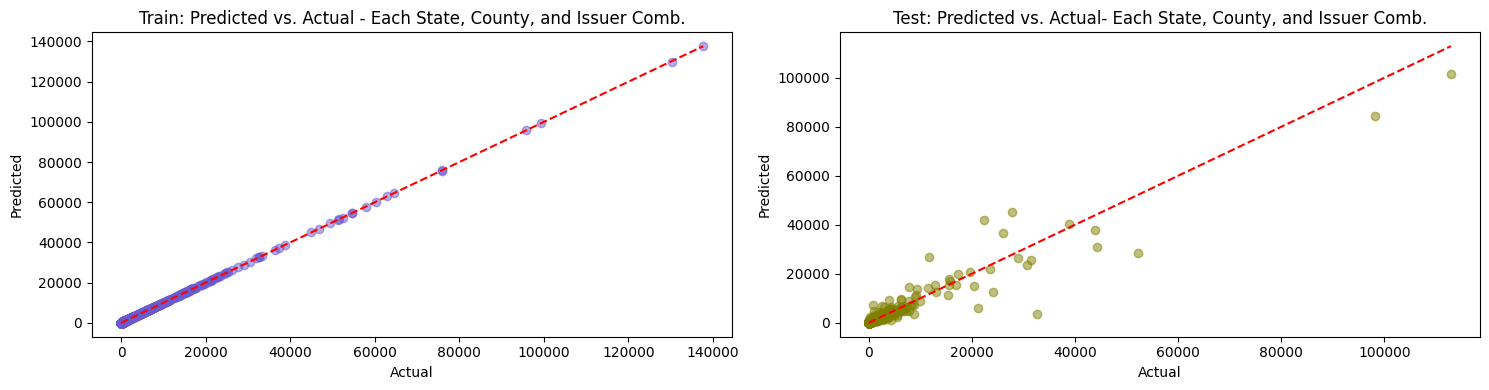

Worst predictions%:
       State  Actual    Predicted  Percentage_Error
599     FL    22.0  1156.423340         51.564697
729     FL    29.0   285.951355          8.860392
5460    OR    25.0   242.814255          8.712570
326     AR    16.0   146.144287          8.134018
7631    WI    29.0   261.950958          8.032792
6418    TX   819.0  7379.524414          8.010408
2249    KS    30.0   256.942108          7.564737
6192    TN   304.0  2456.629150          7.081017
7583    WI   181.0  1458.145630          7.056053
3208    MO    19.0   152.631821          7.033254


In [ ]:
#plot predicted vs. actual
results_train_df, results_test_df = plot_predicted_vs_actual(random_XGBst_class)

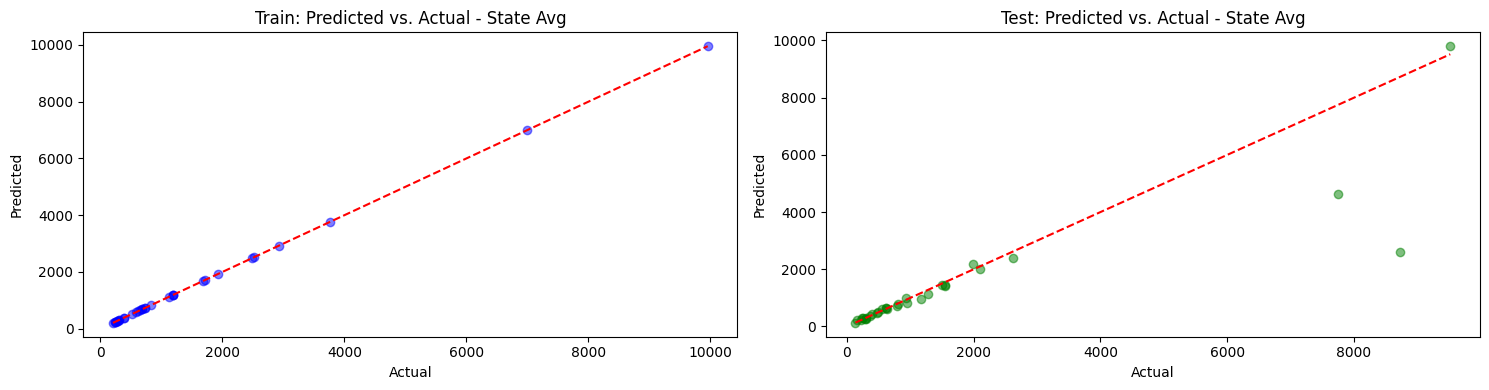

Predictions from worst to best- State Average%:
     State       Actual    Predicted  Percentage_Error
29    AZ  8733.285714  2610.376709          0.701100
9     KS   152.152542   216.744598          0.424522
24    HI  7750.000000  4640.555176          0.401219
8     AK  1164.333333   960.712097          0.174882
2     NE   248.904762   287.859314          0.156504
7     SD   242.153846   278.772522          0.151221
1     LA   945.274510   804.179016          0.149264
18    MI   555.562500   615.538086          0.107955
26    UT  1274.590909  1142.206909          0.103864
15    WY   792.357143   711.169128          0.102464
28    TX  1983.327731  2185.844238          0.102109
5     MT   305.750000   277.283295          0.093105
10    MS   394.955556   431.522827          0.092586
23    NH  1552.333333  1409.218628          0.092193
27    AL  2613.388889  2411.046387          0.077425
13    MO   616.972603   660.234131          0.070119
0     WV   134.500000   125.112885          0.069

In [ ]:
# Predict vs. actual - state avg
results_train_avg, results_test_avg  =plot_predicted_vs_actual_by_state(model=random_XGBst_class)

In [ ]:
# prediction results
abs_mean_error['XG Boost'] = display_results(results_test_avg, exclude_states=['AZ'])

Absolute mean error:  175.54833195280483


## **Part 4.4: Model Comparisons and Feature Importances**

#### **Model comparison**

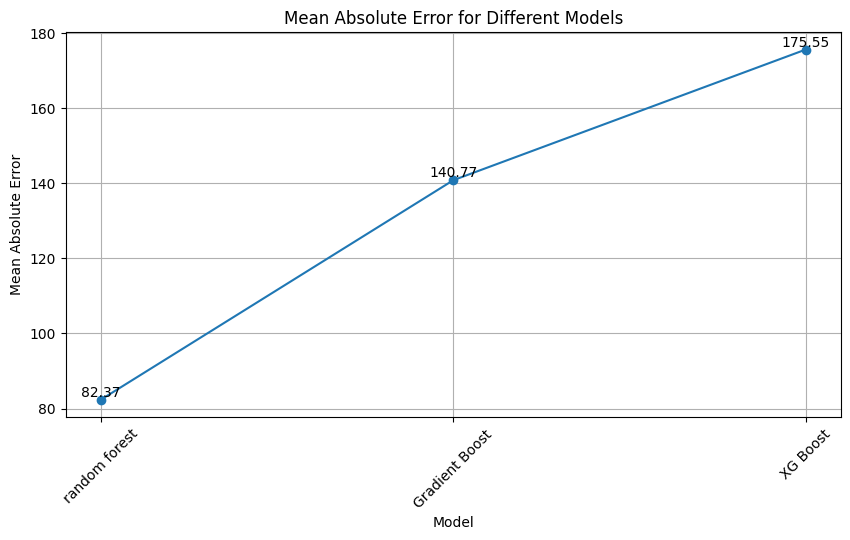

In [ ]:
# Plot line graph of different model performances
plt.figure(figsize=(10, 5))
plt.plot(abs_mean_error.keys(), abs_mean_error.values(), marker='o')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Different Models')
plt.xticks(rotation=45)

for model, error in abs_mean_error.items():
    plt.text(model, error, f'{error:.2f}', ha='center', va='bottom')

plt.grid(True)
plt.show()

#### **Feature Importance**

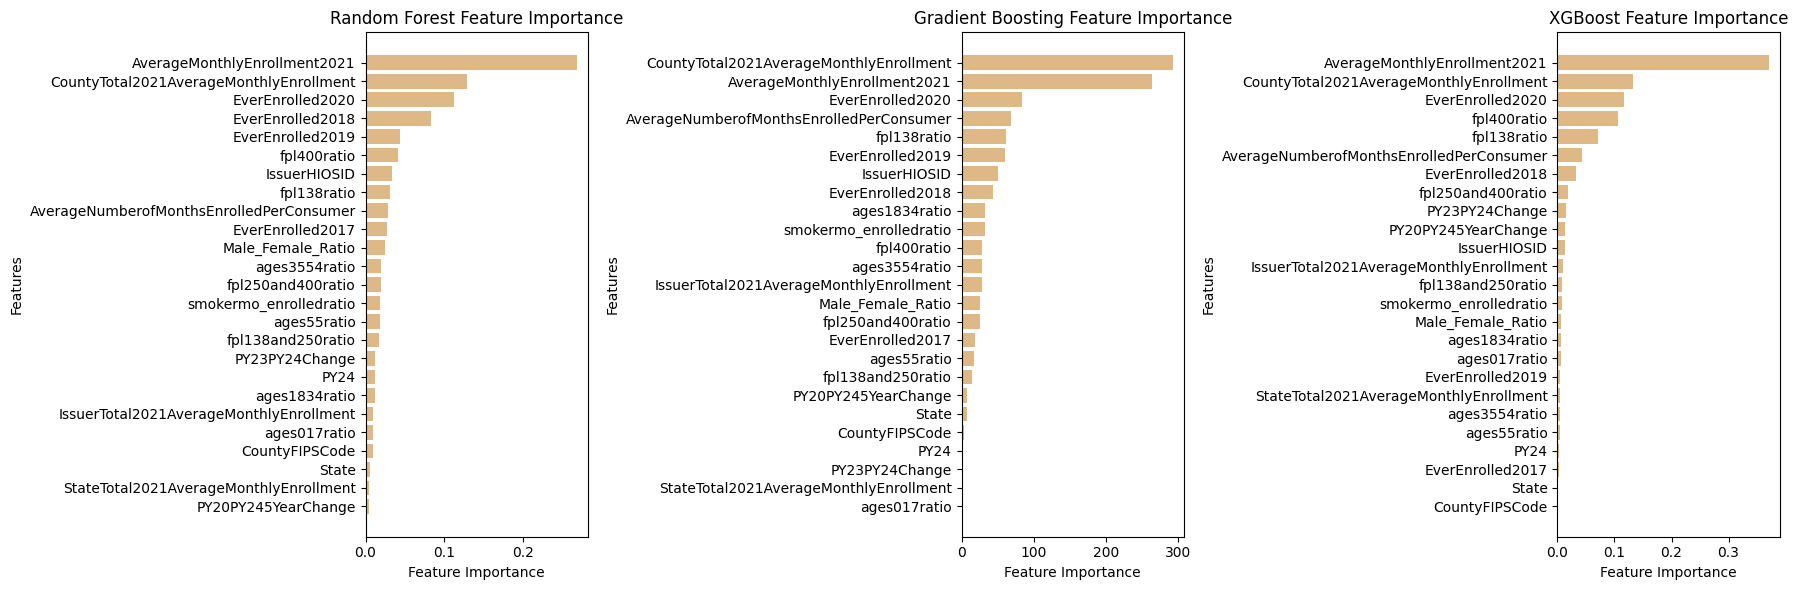

In [ ]:
def plot_feature_importance(models, model_names):
    fig, axes = plt.subplots(1, len(models), figsize=(18, 6))

    for i, (model, name) in enumerate(zip(models, model_names)):
        # Access the underlying estimator of RandomizedSearchCV
        estimator = model.best_estimator_

        # Get feature importances
        feature_importance = estimator.feature_importances_
        sorted_idx = np.argsort(feature_importance)
        features = X_train.columns[sorted_idx]
        importance = feature_importance[sorted_idx]

        ax = axes[i]
        ax.barh(features, importance, color='burlywood')
        ax.set_xlabel('Feature Importance')
        ax.set_ylabel('Features')
        ax.set_title(f'{name} Feature Importance')

    plt.tight_layout()
    plt.show()

# Pass the list of models and their names to the function
models = [ randomFR_class, random_GBM_class, random_XGBst_class]
model_names = ['Random Forest','Gradient Boosting', 'XGBoost']

plot_feature_importance(models, model_names)



✍️ **Model Performance Comparison**

- After extensive hyperparameter tuning and model evaluation, it is evident that the Random Forest algorithm outperforms other models in our dataset.
-This superiority may be attributed to the inherent complexity of gradient boosting and XGBoost algorithms, which possess a larger number of hyperparameters and are more prone to overfitting. While efforts were made to meticulously fine-tune all models, the complexity of boosting trees presents challenges in achieving optimal performance.
